In [1]:
import Utils
config = Utils.readjson("setting.json")

In [2]:
import numpy as np
import scipy.io
X = scipy.io.loadmat('/Users/joshhuang/MATLAB/ONR/Localization/Data/SignalFrame3.mat') 
Y = scipy.io.loadmat('/Users/joshhuang/MATLAB/ONR/Localization/Data/Label3.mat') 

In [3]:
X1 = X['SignalFrame']
Y1 = Y['Label']

from scipy.signal import resample
X1 = resample(X1, 100, axis=1)

In [4]:
X1.shape

(180, 100)

In [5]:
import numpy as np
import pandas as pd
# Generate random data
samples = 180
time_steps = 100
num_classes = 9
import numpy as np
x_train = X1
y_train = Y1
# Create the dataset dictionary
dataset_name = "Location"
dataset = {dataset_name: (x_train, y_train)}
# Save the dataset to a CSV file in the main folder
file_path = "Location.csv"
data_to_save = pd.DataFrame(np.hstack((y_train, x_train)))
data_to_save.to_csv(file_path, index=False, header=False)

# Update the JSON config file with the dataset's file directory and dataset_name
config["data"]["dataset_dir"] = file_path
config["data"]["dataset_name"] = dataset_name

NameError: name 'synthetic_data' is not defined

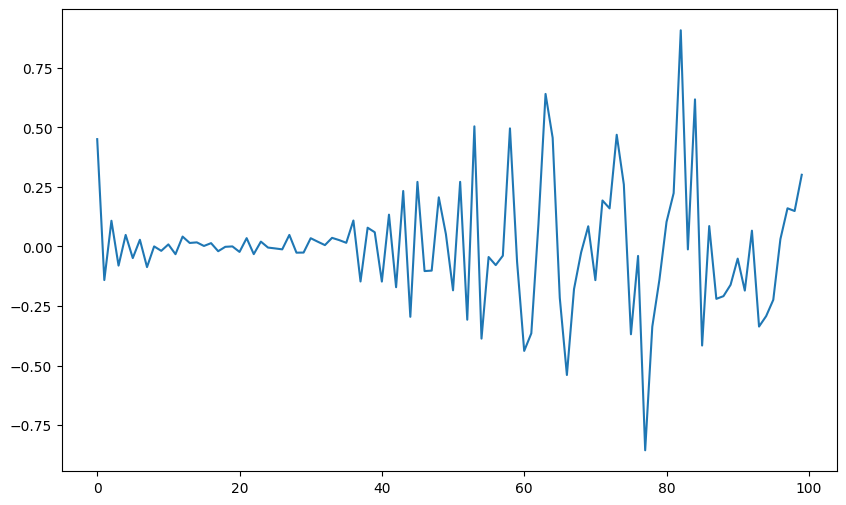

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the input_data and synthetic_data
ax.plot(x_train[160,:])
ax.plot(synthetic_data[350,:], label='Synthetic data')

# Add axis labels, title, and legend
ax.set_xlabel('Time',fontsize = 12,fontweight='bold')
ax.set_ylabel('Amplitude',fontsize = 12,fontweight='bold')
ax.set_title('Input Data')
ax.grid(True)
ax.set_xlim([0,1000])
#ax.set_ylim([-1,1])
plt.show()

In [7]:
file_path = "Location.csv"
dataset_name = "Location"
config["data"]["dataset_dir"] = file_path
config["data"]["dataset_name"] = dataset_name
config["advanced"]["epochs"]=20

In [8]:
def train_and_augmente(GAN, dataset,
                       augmentation_percentage_list, if_keep_raw, advanced):
    if GAN == 'raw':
        return dataset
    elif GAN == 'gan':
        import gans.gan as gan
        return gan.trainGAN(dataset, augmentation_percentage_list,
                            if_keep_raw, advanced)
    elif GAN == 'dcgan':
        import gans.dcgan as dcgan
        return dcgan.trainGAN(dataset,
                              augmentation_percentage_list, if_keep_raw,advanced)
    elif GAN == 'dcgan1':
        import gans.dcgan1 as dcgan
        return dcgan.trainGAN(dataset,
                              augmentation_percentage_list, if_keep_raw,advanced)
    elif GAN == 'wgan':
        import gans.wgan as wgan
        return wgan.trainGAN(dataset, augmentation_percentage_list,
                             if_keep_raw, advanced)
    elif GAN == 'tsagan':
        import gans.tsagan as tsagan
        return tsagan.trainGAN(dataset, augmentation_percentage_list,
                               if_keep_raw, advanced)
    elif GAN == 'tsagan1':
        import gans.tsagan1 as tsagan1
        return tsagan1.trainGAN(dataset, augmentation_percentage_list,
                               if_keep_raw, advanced)
    else:
        print("Error")
        exit(1)

def adjust_augmentation(method, tags):
    if method == 'auto':
        return Utils.adjust_augmentation_auto(tags)
    else:
        print("Error")
        exit(1)

In [9]:
dataset = Utils.read_dataset(config["data"]["dataset_dir"], config["data"]["dataset_name"])
dataset_name = config["data"]["dataset_name"]
augmentation_percentage_method = config["general"]["augmentation_method"]
#augmentation_percentage_list = adjust_augmentation(augmentation_percentage_method, list(dataset[dataset_name][1]))
augmentation_percentage_list = [5]*9
if_keep_raw = config["general"]["keep_raw"]
output_dir = config["data"]["output_dir"]
advanced = config["advanced"]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 1, 64)         640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50, 1, 64)         0         
                                                                 
 dropout (Dropout)           (None, 50, 1, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 1, 64)         36928     
                                                                 
 zero_padding2d (ZeroPaddin  (None, 26, 2, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 26, 2, 64)         256       
 Normalization)                                         

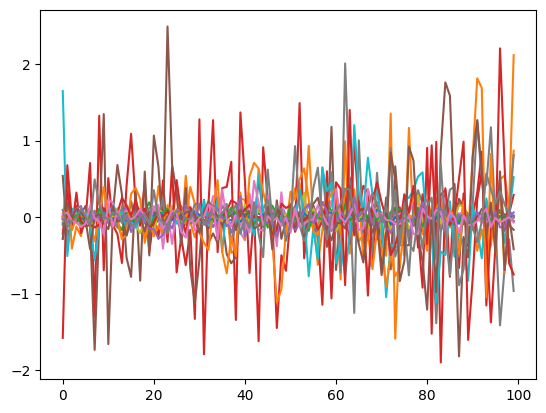

2/2 [==============================] - 0s 6ms/step
Location_1.0:305[D loss:real:0.004410, fake:0.001713,acc.:100.00%][G loss:3.230544]
2/2 [==============================] - 0s 6ms/step
Location_1.0:306[D loss:real:0.003297, fake:0.008059,acc.:100.00%][G loss:2.827217]
2/2 [==============================] - 0s 5ms/step
Location_1.0:307[D loss:real:0.003346, fake:0.009033,acc.:100.00%][G loss:2.823972]
2/2 [==============================] - 0s 5ms/step
Location_1.0:308[D loss:real:0.004649, fake:0.003455,acc.:100.00%][G loss:2.773545]
2/2 [==============================] - 0s 6ms/step
Location_1.0:309[D loss:real:0.002163, fake:0.006999,acc.:100.00%][G loss:2.698673]
2/2 [==============================] - 0s 7ms/step
Location_1.0:310[D loss:real:0.004018, fake:0.000760,acc.:100.00%][G loss:3.739956]
2/2 [==============================] - 0s 6ms/step
Location_1.0:311[D loss:real:0.002817, fake:0.002171,acc.:100.00%][G loss:3.749390]
(100, 1, 1)
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_1.0:365[D loss:real:0.002666, fake:0.000791,acc.:100.00%][G loss:3.821905]
2/2 [==============================] - 0s 7ms/step
Location_1.0:366[D loss:real:0.002607, fake:0.001616,acc.:100.00%][G loss:3.605673]
2/2 [==============================] - 0s 6ms/step
Location_1.0:367[D loss:real:0.002551, fake:0.003716,acc.:100.00%][G loss:3.476221]
2/2 [==============================] - 0s 7ms/step
Location_1.0:368[D loss:real:0.001623, fake:0.000344,acc.:100.00%][G loss:3.604491]
2/2 [==============================] - 0s 6ms/step
Location_1.0:369[D loss:real:0.002998, fake:0.000497,acc.:100.00%][G loss:3.824700]
2/2 [==============================] - 0s 6ms/step
Location_1.0:370[D loss:real:0.001646, fake:0.001822,acc.:100.00%][G loss:3.667732]
2/2 [==============================] - 0s 6ms/step
Location_1.0:371[D loss:real:0.001725, fake:0.001050,acc.:100.00%][G loss:3.606808]
(100, 1, 1)
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_1.0:425[D loss:real:0.027926, fake:0.010070,acc.:100.00%][G loss:1.603018]
2/2 [==============================] - 0s 6ms/step
Location_1.0:426[D loss:real:0.023971, fake:0.033118,acc.:100.00%][G loss:1.742097]
2/2 [==============================] - 0s 7ms/step
Location_1.0:427[D loss:real:0.042681, fake:0.045829,acc.:99.22%][G loss:1.512078]
2/2 [==============================] - 0s 7ms/step
Location_1.0:428[D loss:real:0.016008, fake:0.063882,acc.:100.00%][G loss:1.438462]
2/2 [==============================] - 0s 7ms/step
Location_1.0:429[D loss:real:0.030862, fake:0.015479,acc.:100.00%][G loss:1.441262]
2/2 [==============================] - 0s 7ms/step
Location_1.0:430[D loss:real:0.019972, fake:0.007578,acc.:100.00%][G loss:1.971560]
2/2 [==============================] - 0s 8ms/step
Location_1.0:431[D loss:real:0.016006, fake:0.008922,acc.:100.00%][G loss:1.727001]
(100, 1, 1)
2/2 [==============================] - 0s 6m

2/2 [==============================] - 0s 6ms/step
Location_1.0:485[D loss:real:0.001830, fake:0.000836,acc.:100.00%][G loss:3.315571]
2/2 [==============================] - 0s 8ms/step
Location_1.0:486[D loss:real:0.002155, fake:0.000830,acc.:100.00%][G loss:3.118158]
2/2 [==============================] - 0s 6ms/step
Location_1.0:487[D loss:real:0.001865, fake:0.000996,acc.:100.00%][G loss:3.449203]
2/2 [==============================] - 0s 6ms/step
Location_1.0:488[D loss:real:0.001861, fake:0.000885,acc.:100.00%][G loss:3.383658]
2/2 [==============================] - 0s 7ms/step
Location_1.0:489[D loss:real:0.001999, fake:0.000672,acc.:100.00%][G loss:3.693113]
2/2 [==============================] - 0s 7ms/step
Location_1.0:490[D loss:real:0.001597, fake:0.001180,acc.:100.00%][G loss:2.961573]
2/2 [==============================] - 0s 8ms/step
Location_1.0:491[D loss:real:0.001892, fake:0.001173,acc.:100.00%][G loss:3.398428]
(100, 1, 1)
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 5ms/step
Location_1.0:545[D loss:real:0.000961, fake:0.002834,acc.:100.00%][G loss:2.358132]
2/2 [==============================] - 0s 6ms/step
Location_1.0:546[D loss:real:0.001028, fake:0.004144,acc.:100.00%][G loss:2.047351]
2/2 [==============================] - 0s 6ms/step
Location_1.0:547[D loss:real:0.001163, fake:0.002404,acc.:100.00%][G loss:2.350914]
2/2 [==============================] - 0s 5ms/step
Location_1.0:548[D loss:real:0.000958, fake:0.002624,acc.:100.00%][G loss:2.420804]
2/2 [==============================] - 0s 6ms/step
Location_1.0:549[D loss:real:0.000983, fake:0.005304,acc.:100.00%][G loss:2.131867]
2/2 [==============================] - 0s 8ms/step
Location_1.0:550[D loss:real:0.000840, fake:0.003687,acc.:100.00%][G loss:2.440952]
2/2 [==============================] - 0s 6ms/step
Location_1.0:551[D loss:real:0.001112, fake:0.001780,acc.:100.00%][G loss:2.463221]
(100, 1, 1)
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_1.0:605[D loss:real:0.003548, fake:0.004138,acc.:100.00%][G loss:2.626624]
2/2 [==============================] - 0s 6ms/step
Location_1.0:606[D loss:real:0.002627, fake:0.002525,acc.:100.00%][G loss:2.577588]
2/2 [==============================] - 0s 5ms/step
Location_1.0:607[D loss:real:0.002891, fake:0.002582,acc.:100.00%][G loss:2.735574]
2/2 [==============================] - 0s 5ms/step
Location_1.0:608[D loss:real:0.003054, fake:0.001958,acc.:100.00%][G loss:2.998001]
2/2 [==============================] - 0s 6ms/step
Location_1.0:609[D loss:real:0.002544, fake:0.006823,acc.:100.00%][G loss:2.697556]
2/2 [==============================] - 0s 6ms/step
Location_1.0:610[D loss:real:0.002027, fake:0.002126,acc.:100.00%][G loss:2.599212]
2/2 [==============================] - 0s 6ms/step
Location_1.0:611[D loss:real:0.002772, fake:0.019309,acc.:100.00%][G loss:2.269343]
(100, 1, 1)
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 5ms/step
Location_1.0:665[D loss:real:0.001707, fake:0.001621,acc.:100.00%][G loss:3.252483]
2/2 [==============================] - 0s 6ms/step
Location_1.0:666[D loss:real:0.002191, fake:0.001771,acc.:100.00%][G loss:2.761282]
2/2 [==============================] - 0s 6ms/step
Location_1.0:667[D loss:real:0.001477, fake:0.004014,acc.:100.00%][G loss:2.631953]
2/2 [==============================] - 0s 6ms/step
Location_1.0:668[D loss:real:0.001737, fake:0.001474,acc.:100.00%][G loss:2.981969]
2/2 [==============================] - 0s 6ms/step
Location_1.0:669[D loss:real:0.001449, fake:0.001926,acc.:100.00%][G loss:2.895005]
2/2 [==============================] - 0s 6ms/step
Location_1.0:670[D loss:real:0.001433, fake:0.002036,acc.:100.00%][G loss:2.545986]
2/2 [==============================] - 0s 6ms/step
Location_1.0:671[D loss:real:0.001799, fake:0.002792,acc.:100.00%][G loss:2.711921]
(100, 1, 1)
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 7ms/step
Location_1.0:725[D loss:real:0.005156, fake:0.000366,acc.:100.00%][G loss:4.825208]
2/2 [==============================] - 0s 7ms/step
Location_1.0:726[D loss:real:0.002145, fake:0.000389,acc.:100.00%][G loss:4.841792]
2/2 [==============================] - 0s 7ms/step
Location_1.0:727[D loss:real:0.003446, fake:0.000242,acc.:100.00%][G loss:4.929089]
2/2 [==============================] - 0s 6ms/step
Location_1.0:728[D loss:real:0.002357, fake:0.000355,acc.:100.00%][G loss:5.111189]
2/2 [==============================] - 0s 6ms/step
Location_1.0:729[D loss:real:0.002092, fake:0.000431,acc.:100.00%][G loss:4.773746]
2/2 [==============================] - 0s 6ms/step
Location_1.0:730[D loss:real:0.002236, fake:0.000327,acc.:100.00%][G loss:4.733099]
2/2 [==============================] - 0s 6ms/step
Location_1.0:731[D loss:real:0.002074, fake:0.000258,acc.:100.00%][G loss:4.830300]
(100, 1, 1)
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_1.0:785[D loss:real:0.000894, fake:0.000268,acc.:100.00%][G loss:4.856496]
2/2 [==============================] - 0s 8ms/step
Location_1.0:786[D loss:real:0.000857, fake:0.000319,acc.:100.00%][G loss:4.679343]
2/2 [==============================] - 0s 5ms/step
Location_1.0:787[D loss:real:0.000824, fake:0.000280,acc.:100.00%][G loss:4.607317]
2/2 [==============================] - 0s 5ms/step
Location_1.0:788[D loss:real:0.000766, fake:0.000222,acc.:100.00%][G loss:4.944796]
2/2 [==============================] - 0s 7ms/step
Location_1.0:789[D loss:real:0.000946, fake:0.000289,acc.:100.00%][G loss:4.973603]
2/2 [==============================] - 0s 7ms/step
Location_1.0:790[D loss:real:0.001208, fake:0.000293,acc.:100.00%][G loss:4.825514]
2/2 [==============================] - 0s 6ms/step
Location_1.0:791[D loss:real:0.001090, fake:0.000209,acc.:100.00%][G loss:4.879763]
(100, 1, 1)
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 5ms/step
Location_1.0:845[D loss:real:0.000500, fake:0.000227,acc.:100.00%][G loss:5.369732]
2/2 [==============================] - 0s 6ms/step
Location_1.0:846[D loss:real:0.000512, fake:0.000276,acc.:100.00%][G loss:5.012879]
2/2 [==============================] - 0s 7ms/step
Location_1.0:847[D loss:real:0.000573, fake:0.000251,acc.:100.00%][G loss:5.092651]
2/2 [==============================] - 0s 6ms/step
Location_1.0:848[D loss:real:0.000534, fake:0.000251,acc.:100.00%][G loss:4.807920]
2/2 [==============================] - 0s 6ms/step
Location_1.0:849[D loss:real:0.000637, fake:0.000306,acc.:100.00%][G loss:4.940137]
2/2 [==============================] - 0s 6ms/step
Location_1.0:850[D loss:real:0.000501, fake:0.000341,acc.:100.00%][G loss:4.970556]
2/2 [==============================] - 0s 6ms/step
Location_1.0:851[D loss:real:0.000546, fake:0.000254,acc.:100.00%][G loss:4.969981]
(100, 1, 1)
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_1.0:905[D loss:real:0.000500, fake:0.000236,acc.:100.00%][G loss:4.984130]
2/2 [==============================] - 0s 7ms/step
Location_1.0:906[D loss:real:0.000324, fake:0.000298,acc.:100.00%][G loss:4.700676]
2/2 [==============================] - 0s 5ms/step
Location_1.0:907[D loss:real:0.000393, fake:0.000264,acc.:100.00%][G loss:4.987613]
2/2 [==============================] - 0s 6ms/step
Location_1.0:908[D loss:real:0.000544, fake:0.000278,acc.:100.00%][G loss:4.934997]
2/2 [==============================] - 0s 7ms/step
Location_1.0:909[D loss:real:0.000456, fake:0.000290,acc.:100.00%][G loss:5.009302]
2/2 [==============================] - 0s 6ms/step
Location_1.0:910[D loss:real:0.000329, fake:0.000249,acc.:100.00%][G loss:4.997619]
2/2 [==============================] - 0s 7ms/step
Location_1.0:911[D loss:real:0.000418, fake:0.000290,acc.:100.00%][G loss:4.985684]
(100, 1, 1)
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_1.0:965[D loss:real:0.000327, fake:0.000304,acc.:100.00%][G loss:4.831039]
2/2 [==============================] - 0s 6ms/step
Location_1.0:966[D loss:real:0.000325, fake:0.000283,acc.:100.00%][G loss:5.000879]
2/2 [==============================] - 0s 6ms/step
Location_1.0:967[D loss:real:0.000316, fake:0.000271,acc.:100.00%][G loss:4.634948]
2/2 [==============================] - 0s 7ms/step
Location_1.0:968[D loss:real:0.000261, fake:0.000337,acc.:100.00%][G loss:4.904706]
2/2 [==============================] - 0s 7ms/step
Location_1.0:969[D loss:real:0.000305, fake:0.000262,acc.:100.00%][G loss:5.065383]
2/2 [==============================] - 0s 6ms/step
Location_1.0:970[D loss:real:0.000274, fake:0.000215,acc.:100.00%][G loss:5.088315]
2/2 [==============================] - 0s 7ms/step
Location_1.0:971[D loss:real:0.000273, fake:0.000251,acc.:100.00%][G loss:4.931687]
(100, 1, 1)
2/2 [==============================] - 0s 6

 conv2d_15 (Conv2D)          (None, 8, 8, 64)          4160      
                                                                 
 batch_normalization_12 (Bat  (None, 8, 8, 64)         256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 8, 8, 64)          0         
                                                                 
 up_sampling2d_5 (UpSampling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 100)       102500    
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 100)      400       
 chNormalization)                                                
                                                                 
 activatio

2/2 [==============================] - 0s 6ms/step
Location_2.0:48[D loss:real:0.443938, fake:0.325580,acc.:90.62%][G loss:2.417870]
2/2 [==============================] - 0s 6ms/step
Location_2.0:49[D loss:real:0.238324, fake:0.340652,acc.:96.09%][G loss:2.144106]
2/2 [==============================] - 0s 5ms/step
Location_2.0:50[D loss:real:0.307191, fake:0.705683,acc.:74.22%][G loss:3.601562]
2/2 [==============================] - 0s 5ms/step
Location_2.0:51[D loss:real:0.491277, fake:0.485542,acc.:81.25%][G loss:3.451850]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:52[D loss:real:0.367976, fake:0.267207,acc.:95.31%][G loss:2.601343]
2/2 [==============================] - 0s 7ms/step
Location_2.0:53[D loss:real:0.255857, fake:0.317879,acc.:96.88%][G loss:2.629080]
2/2 [==============================] - 0s 6ms/step
Location_2.0:54[D loss:real:0.217374, fake:0.291401,acc.:97.66%][G loss:3.103751]
2/2 [==============================] - 0s 7ms/step
Locati

2/2 [==============================] - 0s 5ms/step
Location_2.0:109[D loss:real:0.030460, fake:0.024479,acc.:100.00%][G loss:3.025440]
2/2 [==============================] - 0s 6ms/step
Location_2.0:110[D loss:real:0.022524, fake:0.144395,acc.:100.00%][G loss:3.051744]
2/2 [==============================] - 0s 6ms/step
Location_2.0:111[D loss:real:0.043750, fake:0.034052,acc.:100.00%][G loss:3.124912]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Location_2.0:112[D loss:real:0.032986, fake:0.041134,acc.:100.00%][G loss:2.918947]
2/2 [==============================] - 0s 5ms/step
Location_2.0:113[D loss:real:0.024954, fake:0.023577,acc.:100.00%][G loss:3.069442]
2/2 [==============================] - 0s 5ms/step
Location_2.0:114[D loss:real:0.026930, fake:0.033286,acc.:100.00%][G loss:2.867046]
2/2 [==============================] - 0s 5ms/step
Location_2.0:115[D loss:real:0.016750, fake:0.019216,acc.:100.00%][G loss:3.358891]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 7ms/step
Location_2.0:169[D loss:real:0.010594, fake:0.009175,acc.:100.00%][G loss:3.679448]
2/2 [==============================] - 0s 6ms/step
Location_2.0:170[D loss:real:0.006096, fake:0.011840,acc.:100.00%][G loss:3.697551]
2/2 [==============================] - 0s 7ms/step
Location_2.0:171[D loss:real:0.007715, fake:0.009384,acc.:100.00%][G loss:3.505517]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:172[D loss:real:0.007862, fake:0.012643,acc.:100.00%][G loss:3.448794]
2/2 [==============================] - 0s 7ms/step
Location_2.0:173[D loss:real:0.007925, fake:0.012392,acc.:100.00%][G loss:3.604476]
2/2 [==============================] - 0s 10ms/step
Location_2.0:174[D loss:real:0.007248, fake:0.016688,acc.:100.00%][G loss:3.863046]
2/2 [==============================] - 0s 6ms/step
Location_2.0:175[D loss:real:0.007780, fake:0.022204,acc.:100.00%][G loss:3.331869]
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step
Location_2.0:229[D loss:real:0.014087, fake:0.013450,acc.:100.00%][G loss:3.830126]
2/2 [==============================] - 0s 6ms/step
Location_2.0:230[D loss:real:0.021727, fake:0.026468,acc.:100.00%][G loss:3.405142]
2/2 [==============================] - 0s 7ms/step
Location_2.0:231[D loss:real:0.013693, fake:0.012875,acc.:100.00%][G loss:3.326284]
(100, 1, 1)
2/2 [==============================] - 0s 7ms/step
Location_2.0:232[D loss:real:0.010988, fake:0.043802,acc.:100.00%][G loss:3.086934]
2/2 [==============================] - 0s 6ms/step
Location_2.0:233[D loss:real:0.012085, fake:0.023482,acc.:100.00%][G loss:3.107458]
2/2 [==============================] - 0s 6ms/step
Location_2.0:234[D loss:real:0.014560, fake:0.009544,acc.:100.00%][G loss:3.172251]
2/2 [==============================] - 0s 6ms/step
Location_2.0:235[D loss:real:0.011368, fake:0.030546,acc.:100.00%][G loss:3.033278]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 7ms/step
Location_2.0:289[D loss:real:0.019247, fake:0.007680,acc.:100.00%][G loss:4.552833]
2/2 [==============================] - 0s 7ms/step
Location_2.0:290[D loss:real:0.011165, fake:0.004010,acc.:100.00%][G loss:4.482403]
2/2 [==============================] - 0s 6ms/step
Location_2.0:291[D loss:real:0.010517, fake:0.009553,acc.:100.00%][G loss:4.475720]
(100, 1, 1)
2/2 [==============================] - 0s 7ms/step
Location_2.0:292[D loss:real:0.009100, fake:0.004313,acc.:100.00%][G loss:4.701822]
2/2 [==============================] - 0s 7ms/step
Location_2.0:293[D loss:real:0.008642, fake:0.004039,acc.:100.00%][G loss:4.866611]
2/2 [==============================] - 0s 7ms/step
Location_2.0:294[D loss:real:0.006297, fake:0.002977,acc.:100.00%][G loss:5.116071]
2/2 [==============================] - 0s 6ms/step
Location_2.0:295[D loss:real:0.006084, fake:0.003962,acc.:100.00%][G loss:4.936510]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 7ms/step
Location_2.0:349[D loss:real:0.004490, fake:0.010769,acc.:100.00%][G loss:3.742894]
2/2 [==============================] - 0s 7ms/step
Location_2.0:350[D loss:real:0.006208, fake:0.008333,acc.:100.00%][G loss:3.478152]
2/2 [==============================] - 0s 5ms/step
Location_2.0:351[D loss:real:0.005669, fake:0.013172,acc.:100.00%][G loss:3.404099]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:352[D loss:real:0.004072, fake:0.011271,acc.:100.00%][G loss:3.420083]
2/2 [==============================] - 0s 6ms/step
Location_2.0:353[D loss:real:0.003901, fake:0.013266,acc.:100.00%][G loss:3.410081]
2/2 [==============================] - 0s 6ms/step
Location_2.0:354[D loss:real:0.006361, fake:0.010604,acc.:100.00%][G loss:3.397814]
2/2 [==============================] - 0s 7ms/step
Location_2.0:355[D loss:real:0.005273, fake:0.009837,acc.:100.00%][G loss:3.369929]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 6ms/step
Location_2.0:409[D loss:real:0.007604, fake:0.002427,acc.:100.00%][G loss:4.759723]
2/2 [==============================] - 0s 7ms/step
Location_2.0:410[D loss:real:0.006235, fake:0.003039,acc.:100.00%][G loss:4.995584]
2/2 [==============================] - 0s 7ms/step
Location_2.0:411[D loss:real:0.006224, fake:0.005081,acc.:100.00%][G loss:4.531687]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:412[D loss:real:0.007105, fake:0.018783,acc.:100.00%][G loss:4.209079]
2/2 [==============================] - 0s 5ms/step
Location_2.0:413[D loss:real:0.006710, fake:0.006699,acc.:100.00%][G loss:4.208440]
2/2 [==============================] - 0s 6ms/step
Location_2.0:414[D loss:real:0.005194, fake:0.007075,acc.:100.00%][G loss:4.123042]
2/2 [==============================] - 0s 8ms/step
Location_2.0:415[D loss:real:0.009273, fake:0.008559,acc.:100.00%][G loss:4.482854]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 6ms/step
Location_2.0:469[D loss:real:0.003567, fake:0.004146,acc.:100.00%][G loss:4.082511]
2/2 [==============================] - 0s 6ms/step
Location_2.0:470[D loss:real:0.003714, fake:0.003026,acc.:100.00%][G loss:4.614945]
2/2 [==============================] - 0s 6ms/step
Location_2.0:471[D loss:real:0.002377, fake:0.005960,acc.:100.00%][G loss:4.461018]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:472[D loss:real:0.004060, fake:0.005333,acc.:100.00%][G loss:4.332991]
2/2 [==============================] - 0s 6ms/step
Location_2.0:473[D loss:real:0.004060, fake:0.013490,acc.:100.00%][G loss:3.823233]
2/2 [==============================] - 0s 6ms/step
Location_2.0:474[D loss:real:0.003949, fake:0.008789,acc.:100.00%][G loss:3.939424]
2/2 [==============================] - 0s 5ms/step
Location_2.0:475[D loss:real:0.002878, fake:0.060841,acc.:100.00%][G loss:3.525198]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 7ms/step
Location_2.0:529[D loss:real:0.013348, fake:0.030160,acc.:100.00%][G loss:3.226542]
2/2 [==============================] - 0s 7ms/step
Location_2.0:530[D loss:real:0.012018, fake:0.006050,acc.:100.00%][G loss:3.701542]
2/2 [==============================] - 0s 7ms/step
Location_2.0:531[D loss:real:0.015399, fake:0.004408,acc.:100.00%][G loss:3.790237]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:532[D loss:real:0.009054, fake:0.428115,acc.:93.75%][G loss:5.235837]
2/2 [==============================] - 0s 5ms/step
Location_2.0:533[D loss:real:0.360107, fake:0.003996,acc.:93.75%][G loss:3.740310]
2/2 [==============================] - 0s 7ms/step
Location_2.0:534[D loss:real:0.005807, fake:0.006400,acc.:100.00%][G loss:3.933398]
2/2 [==============================] - 0s 7ms/step
Location_2.0:535[D loss:real:0.006247, fake:0.004610,acc.:100.00%][G loss:3.897908]
2/2 [==============================] - 0s 7ms

2/2 [==============================] - 0s 6ms/step
Location_2.0:589[D loss:real:0.005971, fake:0.001261,acc.:100.00%][G loss:4.937054]
2/2 [==============================] - 0s 6ms/step
Location_2.0:590[D loss:real:0.003942, fake:0.002706,acc.:100.00%][G loss:4.714368]
2/2 [==============================] - 0s 7ms/step
Location_2.0:591[D loss:real:0.004992, fake:0.002767,acc.:100.00%][G loss:4.487442]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:592[D loss:real:0.004553, fake:0.005323,acc.:100.00%][G loss:4.206877]
2/2 [==============================] - 0s 7ms/step
Location_2.0:593[D loss:real:0.003633, fake:0.001972,acc.:100.00%][G loss:4.529809]
2/2 [==============================] - 0s 7ms/step
Location_2.0:594[D loss:real:0.004736, fake:0.002105,acc.:100.00%][G loss:4.692250]
2/2 [==============================] - 0s 6ms/step
Location_2.0:595[D loss:real:0.004706, fake:0.026493,acc.:100.00%][G loss:4.069789]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 5ms/step
Location_2.0:649[D loss:real:0.005275, fake:0.002048,acc.:100.00%][G loss:4.141375]
2/2 [==============================] - 0s 7ms/step
Location_2.0:650[D loss:real:0.003786, fake:0.002541,acc.:100.00%][G loss:4.303977]
2/2 [==============================] - 0s 7ms/step
Location_2.0:651[D loss:real:0.003801, fake:0.018128,acc.:100.00%][G loss:3.515028]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:652[D loss:real:0.004318, fake:0.002494,acc.:100.00%][G loss:4.033521]
2/2 [==============================] - 0s 6ms/step
Location_2.0:653[D loss:real:0.004034, fake:0.001888,acc.:100.00%][G loss:4.461785]
2/2 [==============================] - 0s 6ms/step
Location_2.0:654[D loss:real:0.003913, fake:0.003307,acc.:100.00%][G loss:4.487857]
2/2 [==============================] - 0s 5ms/step
Location_2.0:655[D loss:real:0.005293, fake:0.002535,acc.:100.00%][G loss:4.479605]
2/2 [==============================] - 0s 8

2/2 [==============================] - 0s 6ms/step
Location_2.0:709[D loss:real:0.087819, fake:0.055965,acc.:100.00%][G loss:2.580946]
2/2 [==============================] - 0s 5ms/step
Location_2.0:710[D loss:real:0.061886, fake:0.028888,acc.:100.00%][G loss:2.283211]
2/2 [==============================] - 0s 6ms/step
Location_2.0:711[D loss:real:0.030265, fake:0.588691,acc.:83.59%][G loss:3.788921]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Location_2.0:712[D loss:real:1.056343, fake:0.331289,acc.:64.06%][G loss:1.927017]
2/2 [==============================] - 0s 5ms/step
Location_2.0:713[D loss:real:0.016549, fake:0.022356,acc.:100.00%][G loss:1.837105]
2/2 [==============================] - 0s 5ms/step
Location_2.0:714[D loss:real:0.017195, fake:0.483921,acc.:93.75%][G loss:2.586323]
2/2 [==============================] - 0s 6ms/step
Location_2.0:715[D loss:real:0.094051, fake:1.806944,acc.:53.12%][G loss:5.156753]
2/2 [==============================] - 0s 5ms/s

2/2 [==============================] - 0s 6ms/step
Location_2.0:769[D loss:real:0.005235, fake:0.001907,acc.:100.00%][G loss:4.306896]
2/2 [==============================] - 0s 6ms/step
Location_2.0:770[D loss:real:0.004313, fake:0.003644,acc.:100.00%][G loss:3.952782]
2/2 [==============================] - 0s 5ms/step
Location_2.0:771[D loss:real:0.004718, fake:0.001748,acc.:100.00%][G loss:4.066952]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:772[D loss:real:0.004019, fake:0.002589,acc.:100.00%][G loss:4.128259]
2/2 [==============================] - 0s 6ms/step
Location_2.0:773[D loss:real:0.004280, fake:0.007048,acc.:100.00%][G loss:3.267070]
2/2 [==============================] - 0s 5ms/step
Location_2.0:774[D loss:real:0.005240, fake:0.004978,acc.:100.00%][G loss:3.020990]
2/2 [==============================] - 0s 5ms/step
Location_2.0:775[D loss:real:0.005512, fake:0.002421,acc.:100.00%][G loss:3.554901]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 7ms/step
Location_2.0:829[D loss:real:0.014779, fake:0.107019,acc.:100.00%][G loss:2.823651]
2/2 [==============================] - 0s 7ms/step
Location_2.0:830[D loss:real:0.027617, fake:0.017408,acc.:100.00%][G loss:2.579006]
2/2 [==============================] - 0s 7ms/step
Location_2.0:831[D loss:real:0.024919, fake:0.022264,acc.:100.00%][G loss:2.659484]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:832[D loss:real:0.026736, fake:0.475657,acc.:89.06%][G loss:4.061402]
2/2 [==============================] - 0s 7ms/step
Location_2.0:833[D loss:real:0.493175, fake:0.689465,acc.:68.75%][G loss:3.570653]
2/2 [==============================] - 0s 6ms/step
Location_2.0:834[D loss:real:0.313148, fake:0.005556,acc.:96.88%][G loss:2.803321]
2/2 [==============================] - 0s 5ms/step
Location_2.0:835[D loss:real:0.022272, fake:0.001026,acc.:100.00%][G loss:3.966316]
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 7ms/step
Location_2.0:889[D loss:real:0.003679, fake:0.003602,acc.:100.00%][G loss:3.617221]
2/2 [==============================] - 0s 6ms/step
Location_2.0:890[D loss:real:0.002374, fake:0.001723,acc.:100.00%][G loss:3.692528]
2/2 [==============================] - 0s 7ms/step
Location_2.0:891[D loss:real:0.001575, fake:0.003749,acc.:100.00%][G loss:3.381279]
(100, 1, 1)
2/2 [==============================] - 0s 8ms/step
Location_2.0:892[D loss:real:0.003931, fake:0.001580,acc.:100.00%][G loss:3.549613]
2/2 [==============================] - 0s 6ms/step
Location_2.0:893[D loss:real:0.002701, fake:0.002932,acc.:100.00%][G loss:3.629269]
2/2 [==============================] - 0s 7ms/step
Location_2.0:894[D loss:real:0.004062, fake:0.002958,acc.:100.00%][G loss:3.440466]
2/2 [==============================] - 0s 7ms/step
Location_2.0:895[D loss:real:0.002339, fake:0.002157,acc.:100.00%][G loss:3.490290]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 6ms/step
Location_2.0:949[D loss:real:0.002231, fake:0.001496,acc.:100.00%][G loss:3.599048]
2/2 [==============================] - 0s 6ms/step
Location_2.0:950[D loss:real:0.002773, fake:0.001227,acc.:100.00%][G loss:3.643855]
2/2 [==============================] - 0s 7ms/step
Location_2.0:951[D loss:real:0.002418, fake:0.002598,acc.:100.00%][G loss:3.384505]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_2.0:952[D loss:real:0.002291, fake:0.001207,acc.:100.00%][G loss:3.585322]
2/2 [==============================] - 0s 6ms/step
Location_2.0:953[D loss:real:0.002355, fake:0.000968,acc.:100.00%][G loss:3.680044]
2/2 [==============================] - 0s 6ms/step
Location_2.0:954[D loss:real:0.001677, fake:0.001868,acc.:100.00%][G loss:3.476439]
2/2 [==============================] - 0s 5ms/step
Location_2.0:955[D loss:real:0.002340, fake:0.001469,acc.:100.00%][G loss:3.780768]
2/2 [==============================] - 0s 7

                                                                 
 dropout_13 (Dropout)        (None, 26, 2, 64)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 26, 2, 64)         36928     
                                                                 
 batch_normalization_16 (Bat  (None, 26, 2, 64)        256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 26, 2, 64)         0         
                                                                 
 dropout_14 (Dropout)        (None, 26, 2, 64)         0         
                                                                 
 flatten_3 (Flatten)         (None, 3328)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 3329      
          

2/2 [==============================] - 0s 6ms/step
Location_3.0:31[D loss:real:0.029117, fake:0.054485,acc.:100.00%][G loss:3.703717]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_3.0:32[D loss:real:0.024642, fake:0.042427,acc.:100.00%][G loss:4.048266]
2/2 [==============================] - 0s 7ms/step
Location_3.0:33[D loss:real:0.021307, fake:0.054386,acc.:100.00%][G loss:3.753370]
2/2 [==============================] - 0s 8ms/step
Location_3.0:34[D loss:real:0.030064, fake:0.055624,acc.:100.00%][G loss:4.084848]
2/2 [==============================] - 0s 7ms/step
Location_3.0:35[D loss:real:0.022210, fake:0.047780,acc.:100.00%][G loss:3.954071]
2/2 [==============================] - 0s 6ms/step
Location_3.0:36[D loss:real:0.015239, fake:0.045090,acc.:100.00%][G loss:3.504805]
2/2 [==============================] - 0s 6ms/step
Location_3.0:37[D loss:real:0.015979, fake:0.036382,acc.:100.00%][G loss:3.676231]
2/2 [==============================] - 0s 7ms/step

2/2 [==============================] - 0s 7ms/step
Location_3.0:92[D loss:real:0.020815, fake:0.030823,acc.:100.00%][G loss:2.295058]
2/2 [==============================] - 0s 7ms/step
Location_3.0:93[D loss:real:0.020885, fake:0.018718,acc.:100.00%][G loss:2.399583]
2/2 [==============================] - 0s 6ms/step
Location_3.0:94[D loss:real:0.018636, fake:0.013753,acc.:100.00%][G loss:2.518148]
2/2 [==============================] - 0s 6ms/step
Location_3.0:95[D loss:real:0.021437, fake:0.013251,acc.:100.00%][G loss:2.590321]
2/2 [==============================] - 0s 7ms/step
Location_3.0:96[D loss:real:0.015433, fake:0.020609,acc.:100.00%][G loss:2.495347]
2/2 [==============================] - 0s 7ms/step
Location_3.0:97[D loss:real:0.017447, fake:0.015920,acc.:100.00%][G loss:2.525953]
2/2 [==============================] - 0s 7ms/step
Location_3.0:98[D loss:real:0.015366, fake:0.009329,acc.:100.00%][G loss:2.696182]
2/2 [==============================] - 0s 7ms/step
Location_3.

2/2 [==============================] - 0s 7ms/step
Location_3.0:152[D loss:real:0.020052, fake:0.044270,acc.:100.00%][G loss:2.943833]
2/2 [==============================] - 0s 6ms/step
Location_3.0:153[D loss:real:0.018568, fake:0.011761,acc.:100.00%][G loss:2.917657]
2/2 [==============================] - 0s 6ms/step
Location_3.0:154[D loss:real:0.021884, fake:0.012328,acc.:100.00%][G loss:3.297549]
2/2 [==============================] - 0s 7ms/step
Location_3.0:155[D loss:real:0.012483, fake:0.022064,acc.:100.00%][G loss:3.038875]
2/2 [==============================] - 0s 6ms/step
Location_3.0:156[D loss:real:0.014161, fake:0.009941,acc.:100.00%][G loss:3.171898]
2/2 [==============================] - 0s 7ms/step
Location_3.0:157[D loss:real:0.009709, fake:0.026610,acc.:100.00%][G loss:3.526744]
2/2 [==============================] - 0s 8ms/step
Location_3.0:158[D loss:real:0.014871, fake:0.027631,acc.:100.00%][G loss:3.293814]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 7ms/step
Location_3.0:212[D loss:real:0.003070, fake:0.003326,acc.:100.00%][G loss:4.059088]
2/2 [==============================] - 0s 7ms/step
Location_3.0:213[D loss:real:0.001977, fake:0.003595,acc.:100.00%][G loss:4.287059]
2/2 [==============================] - 0s 6ms/step
Location_3.0:214[D loss:real:0.003260, fake:0.004133,acc.:100.00%][G loss:3.984874]
2/2 [==============================] - 0s 6ms/step
Location_3.0:215[D loss:real:0.002150, fake:0.008504,acc.:100.00%][G loss:3.929371]
2/2 [==============================] - 0s 6ms/step
Location_3.0:216[D loss:real:0.002495, fake:0.001941,acc.:100.00%][G loss:4.223403]
2/2 [==============================] - 0s 6ms/step
Location_3.0:217[D loss:real:0.001994, fake:0.003007,acc.:100.00%][G loss:4.102792]
2/2 [==============================] - 0s 6ms/step
Location_3.0:218[D loss:real:0.002429, fake:0.003001,acc.:100.00%][G loss:4.576308]
2/2 [==============================] - 0s 7ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_3.0:272[D loss:real:0.004241, fake:0.007954,acc.:100.00%][G loss:3.768704]
2/2 [==============================] - 0s 6ms/step
Location_3.0:273[D loss:real:0.004624, fake:0.005867,acc.:100.00%][G loss:3.848843]
2/2 [==============================] - 0s 6ms/step
Location_3.0:274[D loss:real:0.005953, fake:0.005695,acc.:100.00%][G loss:4.023642]
2/2 [==============================] - 0s 6ms/step
Location_3.0:275[D loss:real:0.005098, fake:0.172475,acc.:100.00%][G loss:3.631105]
2/2 [==============================] - 0s 5ms/step
Location_3.0:276[D loss:real:0.208628, fake:0.020861,acc.:97.66%][G loss:2.899920]
2/2 [==============================] - 0s 6ms/step
Location_3.0:277[D loss:real:0.000794, fake:0.053464,acc.:100.00%][G loss:2.562688]
2/2 [==============================] - 0s 6ms/step
Location_3.0:278[D loss:real:0.001305, fake:0.002756,acc.:100.00%][G loss:3.268628]
2/2 [==============================] - 0s 6ms/step
Locat

2/2 [==============================] - 0s 6ms/step
Location_3.0:332[D loss:real:0.001250, fake:0.002125,acc.:100.00%][G loss:4.680432]
2/2 [==============================] - 0s 6ms/step
Location_3.0:333[D loss:real:0.001588, fake:0.003169,acc.:100.00%][G loss:4.213445]
2/2 [==============================] - 0s 6ms/step
Location_3.0:334[D loss:real:0.001359, fake:0.000689,acc.:100.00%][G loss:4.622361]
2/2 [==============================] - 0s 5ms/step
Location_3.0:335[D loss:real:0.001320, fake:0.001026,acc.:100.00%][G loss:4.478323]
2/2 [==============================] - 0s 6ms/step
Location_3.0:336[D loss:real:0.001028, fake:0.001016,acc.:100.00%][G loss:5.159672]
2/2 [==============================] - 0s 6ms/step
Location_3.0:337[D loss:real:0.001088, fake:0.000830,acc.:100.00%][G loss:5.405439]
2/2 [==============================] - 0s 6ms/step
Location_3.0:338[D loss:real:0.001459, fake:0.000829,acc.:100.00%][G loss:4.925220]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_3.0:392[D loss:real:0.001239, fake:0.009633,acc.:100.00%][G loss:3.911757]
2/2 [==============================] - 0s 6ms/step
Location_3.0:393[D loss:real:0.001971, fake:0.003436,acc.:100.00%][G loss:4.154575]
2/2 [==============================] - 0s 6ms/step
Location_3.0:394[D loss:real:0.001720, fake:0.001869,acc.:100.00%][G loss:3.915125]
2/2 [==============================] - 0s 7ms/step
Location_3.0:395[D loss:real:0.001895, fake:0.001445,acc.:100.00%][G loss:4.281059]
2/2 [==============================] - 0s 7ms/step
Location_3.0:396[D loss:real:0.001178, fake:0.001091,acc.:100.00%][G loss:4.691114]
2/2 [==============================] - 0s 7ms/step
Location_3.0:397[D loss:real:0.001819, fake:0.001192,acc.:100.00%][G loss:5.018932]
2/2 [==============================] - 0s 6ms/step
Location_3.0:398[D loss:real:0.001356, fake:0.002310,acc.:100.00%][G loss:4.696471]
2/2 [==============================] - 0s 7ms/step
Loca

2/2 [==============================] - 0s 5ms/step
Location_3.0:452[D loss:real:0.009879, fake:0.007832,acc.:100.00%][G loss:2.636078]
2/2 [==============================] - 0s 6ms/step
Location_3.0:453[D loss:real:0.014237, fake:0.010329,acc.:100.00%][G loss:2.501447]
2/2 [==============================] - 0s 6ms/step
Location_3.0:454[D loss:real:0.008302, fake:0.003090,acc.:100.00%][G loss:2.679573]
2/2 [==============================] - 0s 6ms/step
Location_3.0:455[D loss:real:0.009380, fake:0.002265,acc.:100.00%][G loss:3.136433]
2/2 [==============================] - 0s 6ms/step
Location_3.0:456[D loss:real:0.009785, fake:0.002798,acc.:100.00%][G loss:3.554376]
2/2 [==============================] - 0s 6ms/step
Location_3.0:457[D loss:real:0.006646, fake:0.001803,acc.:100.00%][G loss:3.543087]
2/2 [==============================] - 0s 5ms/step
Location_3.0:458[D loss:real:0.006418, fake:0.001399,acc.:100.00%][G loss:3.897494]
2/2 [==============================] - 0s 5ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_3.0:512[D loss:real:0.001095, fake:0.000945,acc.:100.00%][G loss:5.478511]
2/2 [==============================] - 0s 5ms/step
Location_3.0:513[D loss:real:0.000985, fake:0.000641,acc.:100.00%][G loss:5.235985]
2/2 [==============================] - 0s 6ms/step
Location_3.0:514[D loss:real:0.001114, fake:0.000872,acc.:100.00%][G loss:5.399082]
2/2 [==============================] - 0s 5ms/step
Location_3.0:515[D loss:real:0.001434, fake:0.000734,acc.:100.00%][G loss:5.304432]
2/2 [==============================] - 0s 5ms/step
Location_3.0:516[D loss:real:0.001146, fake:0.000712,acc.:100.00%][G loss:5.160623]
2/2 [==============================] - 0s 6ms/step
Location_3.0:517[D loss:real:0.001478, fake:0.000854,acc.:100.00%][G loss:5.389102]
2/2 [==============================] - 0s 5ms/step
Location_3.0:518[D loss:real:0.001294, fake:0.000883,acc.:100.00%][G loss:5.316553]
2/2 [==============================] - 0s 5ms/step
Loca

2/2 [==============================] - 0s 5ms/step
Location_3.0:572[D loss:real:0.000553, fake:0.000581,acc.:100.00%][G loss:5.775548]
2/2 [==============================] - 0s 5ms/step
Location_3.0:573[D loss:real:0.000575, fake:0.000616,acc.:100.00%][G loss:5.579441]
2/2 [==============================] - 0s 6ms/step
Location_3.0:574[D loss:real:0.000741, fake:0.000621,acc.:100.00%][G loss:5.617286]
2/2 [==============================] - 0s 5ms/step
Location_3.0:575[D loss:real:0.000497, fake:0.000635,acc.:100.00%][G loss:5.452417]
2/2 [==============================] - 0s 5ms/step
Location_3.0:576[D loss:real:0.000500, fake:0.000615,acc.:100.00%][G loss:5.725193]
2/2 [==============================] - 0s 6ms/step
Location_3.0:577[D loss:real:0.000493, fake:0.000584,acc.:100.00%][G loss:5.569159]
2/2 [==============================] - 0s 6ms/step
Location_3.0:578[D loss:real:0.000657, fake:0.000571,acc.:100.00%][G loss:5.608100]
2/2 [==============================] - 0s 7ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_3.0:632[D loss:real:0.000438, fake:0.000618,acc.:100.00%][G loss:6.084375]
2/2 [==============================] - 0s 6ms/step
Location_3.0:633[D loss:real:0.000434, fake:0.000459,acc.:100.00%][G loss:5.908658]
2/2 [==============================] - 0s 5ms/step
Location_3.0:634[D loss:real:0.000410, fake:0.000576,acc.:100.00%][G loss:5.890820]
2/2 [==============================] - 0s 6ms/step
Location_3.0:635[D loss:real:0.000432, fake:0.000449,acc.:100.00%][G loss:5.866400]
2/2 [==============================] - 0s 6ms/step
Location_3.0:636[D loss:real:0.000476, fake:0.000628,acc.:100.00%][G loss:5.810292]
2/2 [==============================] - 0s 6ms/step
Location_3.0:637[D loss:real:0.000491, fake:0.000557,acc.:100.00%][G loss:5.827458]
2/2 [==============================] - 0s 6ms/step
Location_3.0:638[D loss:real:0.000425, fake:0.000377,acc.:100.00%][G loss:5.919202]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 5ms/step
Location_3.0:692[D loss:real:0.000334, fake:0.000393,acc.:100.00%][G loss:5.943299]
2/2 [==============================] - 0s 6ms/step
Location_3.0:693[D loss:real:0.000339, fake:0.000390,acc.:100.00%][G loss:6.063257]
2/2 [==============================] - 0s 5ms/step
Location_3.0:694[D loss:real:0.000341, fake:0.000440,acc.:100.00%][G loss:6.170996]
2/2 [==============================] - 0s 5ms/step
Location_3.0:695[D loss:real:0.000320, fake:0.000404,acc.:100.00%][G loss:6.224207]
2/2 [==============================] - 0s 6ms/step
Location_3.0:696[D loss:real:0.000314, fake:0.000344,acc.:100.00%][G loss:6.210573]
2/2 [==============================] - 0s 6ms/step
Location_3.0:697[D loss:real:0.000281, fake:0.000302,acc.:100.00%][G loss:6.266561]
2/2 [==============================] - 0s 5ms/step
Location_3.0:698[D loss:real:0.000474, fake:0.000398,acc.:100.00%][G loss:6.108230]
2/2 [==============================] - 0s 5ms/step
Loca

2/2 [==============================] - 0s 7ms/step
Location_3.0:752[D loss:real:0.000253, fake:0.000317,acc.:100.00%][G loss:6.310294]
2/2 [==============================] - 0s 6ms/step
Location_3.0:753[D loss:real:0.000336, fake:0.000257,acc.:100.00%][G loss:6.385413]
2/2 [==============================] - 0s 7ms/step
Location_3.0:754[D loss:real:0.000329, fake:0.000265,acc.:100.00%][G loss:6.277681]
2/2 [==============================] - 0s 7ms/step
Location_3.0:755[D loss:real:0.000224, fake:0.000318,acc.:100.00%][G loss:6.274763]
2/2 [==============================] - 0s 5ms/step
Location_3.0:756[D loss:real:0.000326, fake:0.000315,acc.:100.00%][G loss:6.268901]
2/2 [==============================] - 0s 7ms/step
Location_3.0:757[D loss:real:0.000270, fake:0.000271,acc.:100.00%][G loss:6.413000]
2/2 [==============================] - 0s 6ms/step
Location_3.0:758[D loss:real:0.000309, fake:0.000341,acc.:100.00%][G loss:6.418725]
2/2 [==============================] - 0s 7ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_3.0:812[D loss:real:0.000232, fake:0.000275,acc.:100.00%][G loss:6.504137]
2/2 [==============================] - 0s 6ms/step
Location_3.0:813[D loss:real:0.000174, fake:0.000277,acc.:100.00%][G loss:6.480126]
2/2 [==============================] - 0s 6ms/step
Location_3.0:814[D loss:real:0.000213, fake:0.000245,acc.:100.00%][G loss:6.422970]
2/2 [==============================] - 0s 6ms/step
Location_3.0:815[D loss:real:0.000217, fake:0.000257,acc.:100.00%][G loss:6.608435]
2/2 [==============================] - 0s 6ms/step
Location_3.0:816[D loss:real:0.000241, fake:0.000227,acc.:100.00%][G loss:6.486872]
2/2 [==============================] - 0s 5ms/step
Location_3.0:817[D loss:real:0.000255, fake:0.000250,acc.:100.00%][G loss:6.369904]
2/2 [==============================] - 0s 6ms/step
Location_3.0:818[D loss:real:0.000238, fake:0.000248,acc.:100.00%][G loss:6.509128]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_3.0:872[D loss:real:0.000164, fake:0.000240,acc.:100.00%][G loss:6.603661]
2/2 [==============================] - 0s 6ms/step
Location_3.0:873[D loss:real:0.000164, fake:0.000201,acc.:100.00%][G loss:6.523821]
2/2 [==============================] - 0s 6ms/step
Location_3.0:874[D loss:real:0.000185, fake:0.000199,acc.:100.00%][G loss:6.565765]
2/2 [==============================] - 0s 5ms/step
Location_3.0:875[D loss:real:0.000189, fake:0.000188,acc.:100.00%][G loss:6.466324]
2/2 [==============================] - 0s 6ms/step
Location_3.0:876[D loss:real:0.000177, fake:0.000210,acc.:100.00%][G loss:6.495940]
2/2 [==============================] - 0s 6ms/step
Location_3.0:877[D loss:real:0.000168, fake:0.000236,acc.:100.00%][G loss:6.607497]
2/2 [==============================] - 0s 6ms/step
Location_3.0:878[D loss:real:0.000205, fake:0.000258,acc.:100.00%][G loss:6.495944]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_3.0:932[D loss:real:0.000191, fake:0.000187,acc.:100.00%][G loss:6.521401]
2/2 [==============================] - 0s 6ms/step
Location_3.0:933[D loss:real:0.000160, fake:0.000158,acc.:100.00%][G loss:6.612530]
2/2 [==============================] - 0s 6ms/step
Location_3.0:934[D loss:real:0.000163, fake:0.000240,acc.:100.00%][G loss:6.621175]
2/2 [==============================] - 0s 6ms/step
Location_3.0:935[D loss:real:0.000153, fake:0.000203,acc.:100.00%][G loss:6.616609]
2/2 [==============================] - 0s 6ms/step
Location_3.0:936[D loss:real:0.000179, fake:0.000208,acc.:100.00%][G loss:6.495433]
2/2 [==============================] - 0s 6ms/step
Location_3.0:937[D loss:real:0.000184, fake:0.000184,acc.:100.00%][G loss:6.513124]
2/2 [==============================] - 0s 6ms/step
Location_3.0:938[D loss:real:0.000149, fake:0.000184,acc.:100.00%][G loss:6.531283]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_3.0:992[D loss:real:0.000155, fake:0.000143,acc.:100.00%][G loss:6.214567]
2/2 [==============================] - 0s 6ms/step
Location_3.0:993[D loss:real:0.000146, fake:0.000206,acc.:100.00%][G loss:6.364618]
2/2 [==============================] - 0s 6ms/step
Location_3.0:994[D loss:real:0.000138, fake:0.000138,acc.:100.00%][G loss:6.536030]
2/2 [==============================] - 0s 6ms/step
Location_3.0:995[D loss:real:0.000127, fake:0.000164,acc.:100.00%][G loss:6.421770]
2/2 [==============================] - 0s 5ms/step
Location_3.0:996[D loss:real:0.000177, fake:0.000181,acc.:100.00%][G loss:6.302102]
2/2 [==============================] - 0s 6ms/step
Location_3.0:997[D loss:real:0.000130, fake:0.000167,acc.:100.00%][G loss:6.284487]
2/2 [==============================] - 0s 6ms/step
Location_3.0:998[D loss:real:0.000145, fake:0.000148,acc.:100.00%][G loss:6.433096]
2/2 [==============================] - 0s 5ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_4.0:14[D loss:real:0.768931, fake:1.405491,acc.:30.47%][G loss:1.767019]
2/2 [==============================] - 0s 6ms/step
Location_4.0:15[D loss:real:0.879976, fake:1.071562,acc.:35.16%][G loss:1.503714]
2/2 [==============================] - 0s 5ms/step
Location_4.0:16[D loss:real:0.758948, fake:1.524931,acc.:28.12%][G loss:2.097629]
2/2 [==============================] - 0s 6ms/step
Location_4.0:17[D loss:real:0.967469, fake:1.226174,acc.:24.22%][G loss:2.185956]
2/2 [==============================] - 0s 6ms/step
Location_4.0:18[D loss:real:0.953204, fake:1.296808,acc.:26.56%][G loss:2.103523]
2/2 [==============================] - 0s 5ms/step
Location_4.0:19[D loss:real:1.173497, fake:1.212668,acc.:17.19%][G loss:1.822023]
2/2 [==============================] - 0s 5ms/step
Location_4.0:20[D loss:real:1.006871, fake:1.180196,acc.:23.44%][G loss:1.878231]
2/2 [==============================] - 0s 6ms/step
Location_4.0:21[D 

2/2 [==============================] - 0s 6ms/step
Location_4.0:75[D loss:real:0.482308, fake:0.586980,acc.:75.78%][G loss:0.530539]
2/2 [==============================] - 0s 5ms/step
Location_4.0:76[D loss:real:0.532285, fake:0.169221,acc.:85.94%][G loss:0.309603]
2/2 [==============================] - 0s 5ms/step
Location_4.0:77[D loss:real:0.309039, fake:0.355326,acc.:93.75%][G loss:0.394817]
2/2 [==============================] - 0s 6ms/step
Location_4.0:78[D loss:real:0.401637, fake:0.300926,acc.:91.41%][G loss:0.350972]
2/2 [==============================] - 0s 6ms/step
Location_4.0:79[D loss:real:0.334291, fake:0.410168,acc.:90.62%][G loss:0.367393]
2/2 [==============================] - 0s 5ms/step
Location_4.0:80[D loss:real:0.446956, fake:0.299428,acc.:91.41%][G loss:0.382514]
2/2 [==============================] - 0s 5ms/step
Location_4.0:81[D loss:real:0.387940, fake:0.433325,acc.:85.16%][G loss:0.448005]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Locati

2/2 [==============================] - 0s 6ms/step
Location_4.0:136[D loss:real:0.042722, fake:0.025559,acc.:100.00%][G loss:0.144710]
2/2 [==============================] - 0s 6ms/step
Location_4.0:137[D loss:real:0.034074, fake:0.040167,acc.:100.00%][G loss:0.135753]
2/2 [==============================] - 0s 5ms/step
Location_4.0:138[D loss:real:0.040180, fake:0.016637,acc.:100.00%][G loss:0.130265]
2/2 [==============================] - 0s 6ms/step
Location_4.0:139[D loss:real:0.037752, fake:0.014690,acc.:100.00%][G loss:0.139056]
2/2 [==============================] - 0s 6ms/step
Location_4.0:140[D loss:real:0.031741, fake:0.050409,acc.:99.22%][G loss:0.078899]
2/2 [==============================] - 0s 6ms/step
Location_4.0:141[D loss:real:0.041134, fake:0.033077,acc.:100.00%][G loss:0.083739]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_4.0:142[D loss:real:0.032180, fake:0.013549,acc.:100.00%][G loss:0.144230]
2/2 [==============================] - 0s 5m

2/2 [==============================] - 0s 5ms/step
Location_4.0:196[D loss:real:0.014657, fake:0.014783,acc.:100.00%][G loss:0.080606]
2/2 [==============================] - 0s 5ms/step
Location_4.0:197[D loss:real:0.013876, fake:0.004220,acc.:100.00%][G loss:0.122531]
2/2 [==============================] - 0s 5ms/step
Location_4.0:198[D loss:real:0.010933, fake:0.003514,acc.:100.00%][G loss:0.162090]
2/2 [==============================] - 0s 6ms/step
Location_4.0:199[D loss:real:0.012605, fake:0.005147,acc.:100.00%][G loss:0.115223]
2/2 [==============================] - 0s 6ms/step
Location_4.0:200[D loss:real:0.011606, fake:0.015243,acc.:100.00%][G loss:0.125614]
2/2 [==============================] - 0s 5ms/step
Location_4.0:201[D loss:real:0.012345, fake:0.010754,acc.:100.00%][G loss:0.078407]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_4.0:202[D loss:real:0.013442, fake:0.030918,acc.:100.00%][G loss:0.107920]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_4.0:256[D loss:real:0.007402, fake:0.003475,acc.:100.00%][G loss:0.103408]
2/2 [==============================] - 0s 5ms/step
Location_4.0:257[D loss:real:0.006558, fake:0.002033,acc.:100.00%][G loss:0.064035]
2/2 [==============================] - 0s 6ms/step
Location_4.0:258[D loss:real:0.008008, fake:0.002775,acc.:100.00%][G loss:0.032974]
2/2 [==============================] - 0s 5ms/step
Location_4.0:259[D loss:real:0.006712, fake:0.001352,acc.:100.00%][G loss:0.031262]
2/2 [==============================] - 0s 5ms/step
Location_4.0:260[D loss:real:0.005716, fake:0.002437,acc.:100.00%][G loss:0.057030]
2/2 [==============================] - 0s 6ms/step
Location_4.0:261[D loss:real:0.005348, fake:0.002947,acc.:100.00%][G loss:0.061242]
(100, 1, 1)
2/2 [==============================] - 0s 7ms/step
Location_4.0:262[D loss:real:0.006929, fake:0.003083,acc.:100.00%][G loss:0.050718]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 6ms/step
Location_4.0:316[D loss:real:0.005437, fake:0.000452,acc.:100.00%][G loss:0.108105]
2/2 [==============================] - 0s 6ms/step
Location_4.0:317[D loss:real:0.004483, fake:0.000745,acc.:100.00%][G loss:0.083165]
2/2 [==============================] - 0s 7ms/step
Location_4.0:318[D loss:real:0.005637, fake:0.004150,acc.:100.00%][G loss:0.074611]
2/2 [==============================] - 0s 6ms/step
Location_4.0:319[D loss:real:0.005203, fake:0.000735,acc.:100.00%][G loss:0.098444]
2/2 [==============================] - 0s 6ms/step
Location_4.0:320[D loss:real:0.003901, fake:0.001824,acc.:100.00%][G loss:0.076203]
2/2 [==============================] - 0s 6ms/step
Location_4.0:321[D loss:real:0.004161, fake:0.009272,acc.:100.00%][G loss:0.104948]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_4.0:322[D loss:real:0.005059, fake:0.001935,acc.:100.00%][G loss:0.035741]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 7ms/step
Location_4.0:376[D loss:real:0.003586, fake:0.003752,acc.:100.00%][G loss:0.030108]
2/2 [==============================] - 0s 6ms/step
Location_4.0:377[D loss:real:0.004237, fake:0.005052,acc.:100.00%][G loss:0.054956]
2/2 [==============================] - 0s 6ms/step
Location_4.0:378[D loss:real:0.004005, fake:0.001334,acc.:100.00%][G loss:0.036835]
2/2 [==============================] - 0s 6ms/step
Location_4.0:379[D loss:real:0.003425, fake:0.001414,acc.:100.00%][G loss:0.061908]
2/2 [==============================] - 0s 5ms/step
Location_4.0:380[D loss:real:0.003838, fake:0.000319,acc.:100.00%][G loss:0.033423]
2/2 [==============================] - 0s 7ms/step
Location_4.0:381[D loss:real:0.003741, fake:0.002275,acc.:100.00%][G loss:0.084534]
(100, 1, 1)
2/2 [==============================] - 0s 7ms/step
Location_4.0:382[D loss:real:0.003233, fake:0.000699,acc.:100.00%][G loss:0.075655]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 5ms/step
Location_4.0:436[D loss:real:0.001666, fake:0.000333,acc.:100.00%][G loss:0.042913]
2/2 [==============================] - 0s 6ms/step
Location_4.0:437[D loss:real:0.001364, fake:0.000448,acc.:100.00%][G loss:0.011653]
2/2 [==============================] - 0s 6ms/step
Location_4.0:438[D loss:real:0.001603, fake:0.001708,acc.:100.00%][G loss:0.032145]
2/2 [==============================] - 0s 5ms/step
Location_4.0:439[D loss:real:0.001982, fake:0.000623,acc.:100.00%][G loss:0.017872]
2/2 [==============================] - 0s 6ms/step
Location_4.0:440[D loss:real:0.001645, fake:0.000820,acc.:100.00%][G loss:0.029448]
2/2 [==============================] - 0s 6ms/step
Location_4.0:441[D loss:real:0.001451, fake:0.000516,acc.:100.00%][G loss:0.022748]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_4.0:442[D loss:real:0.001772, fake:0.005578,acc.:100.00%][G loss:0.008579]
2/2 [==============================] - 0s 5

2/2 [==============================] - 0s 6ms/step
Location_4.0:496[D loss:real:0.001498, fake:0.001097,acc.:100.00%][G loss:0.034714]
2/2 [==============================] - 0s 6ms/step
Location_4.0:497[D loss:real:0.001596, fake:0.001350,acc.:100.00%][G loss:0.024323]
2/2 [==============================] - 0s 6ms/step
Location_4.0:498[D loss:real:0.001818, fake:0.001219,acc.:100.00%][G loss:0.026955]
2/2 [==============================] - 0s 6ms/step
Location_4.0:499[D loss:real:0.001683, fake:0.000847,acc.:100.00%][G loss:0.019820]
2/2 [==============================] - 0s 7ms/step
Location_4.0:500[D loss:real:0.001712, fake:0.007514,acc.:100.00%][G loss:0.013331]
2/2 [==============================] - 0s 7ms/step
Location_4.0:501[D loss:real:0.001888, fake:0.007395,acc.:100.00%][G loss:0.014480]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_4.0:502[D loss:real:0.001979, fake:0.002648,acc.:100.00%][G loss:0.018740]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 5ms/step
Location_4.0:556[D loss:real:0.002092, fake:0.000661,acc.:100.00%][G loss:0.052392]
2/2 [==============================] - 0s 7ms/step
Location_4.0:557[D loss:real:0.001841, fake:0.002132,acc.:100.00%][G loss:0.011191]
2/2 [==============================] - 0s 6ms/step
Location_4.0:558[D loss:real:0.001758, fake:0.001256,acc.:100.00%][G loss:0.032719]
2/2 [==============================] - 0s 6ms/step
Location_4.0:559[D loss:real:0.002284, fake:0.001688,acc.:100.00%][G loss:0.034713]
2/2 [==============================] - 0s 7ms/step
Location_4.0:560[D loss:real:0.001798, fake:0.000969,acc.:100.00%][G loss:0.019965]
2/2 [==============================] - 0s 6ms/step
Location_4.0:561[D loss:real:0.002102, fake:0.000194,acc.:100.00%][G loss:0.032180]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_4.0:562[D loss:real:0.001829, fake:0.000239,acc.:100.00%][G loss:0.018496]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_4.0:616[D loss:real:0.001159, fake:0.000161,acc.:100.00%][G loss:0.016865]
2/2 [==============================] - 0s 5ms/step
Location_4.0:617[D loss:real:0.001277, fake:0.000771,acc.:100.00%][G loss:0.019452]
2/2 [==============================] - 0s 6ms/step
Location_4.0:618[D loss:real:0.000960, fake:0.000251,acc.:100.00%][G loss:0.020436]
2/2 [==============================] - 0s 6ms/step
Location_4.0:619[D loss:real:0.001113, fake:0.000727,acc.:100.00%][G loss:0.030790]
2/2 [==============================] - 0s 6ms/step
Location_4.0:620[D loss:real:0.001002, fake:0.002040,acc.:100.00%][G loss:0.008763]
2/2 [==============================] - 0s 6ms/step
Location_4.0:621[D loss:real:0.001027, fake:0.000095,acc.:100.00%][G loss:0.021031]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_4.0:622[D loss:real:0.001138, fake:0.000197,acc.:100.00%][G loss:0.022570]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 5ms/step
Location_4.0:676[D loss:real:0.001490, fake:0.000188,acc.:100.00%][G loss:0.051107]
2/2 [==============================] - 0s 6ms/step
Location_4.0:677[D loss:real:0.001969, fake:0.000329,acc.:100.00%][G loss:0.033228]
2/2 [==============================] - 0s 5ms/step
Location_4.0:678[D loss:real:0.001676, fake:0.000156,acc.:100.00%][G loss:0.047284]
2/2 [==============================] - 0s 5ms/step
Location_4.0:679[D loss:real:0.001526, fake:0.000365,acc.:100.00%][G loss:0.041595]
2/2 [==============================] - 0s 5ms/step
Location_4.0:680[D loss:real:0.001212, fake:0.000483,acc.:100.00%][G loss:0.017840]
2/2 [==============================] - 0s 5ms/step
Location_4.0:681[D loss:real:0.001183, fake:0.000358,acc.:100.00%][G loss:0.068209]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Location_4.0:682[D loss:real:0.001230, fake:0.000416,acc.:100.00%][G loss:0.029016]
2/2 [==============================] - 0s 5

2/2 [==============================] - 0s 6ms/step
Location_4.0:736[D loss:real:0.000746, fake:0.000626,acc.:100.00%][G loss:0.008832]
2/2 [==============================] - 0s 6ms/step
Location_4.0:737[D loss:real:0.000983, fake:0.001023,acc.:100.00%][G loss:0.014148]
2/2 [==============================] - 0s 5ms/step
Location_4.0:738[D loss:real:0.000944, fake:0.001203,acc.:100.00%][G loss:0.016663]
2/2 [==============================] - 0s 6ms/step
Location_4.0:739[D loss:real:0.000994, fake:0.001102,acc.:100.00%][G loss:0.019705]
2/2 [==============================] - 0s 6ms/step
Location_4.0:740[D loss:real:0.000933, fake:0.000431,acc.:100.00%][G loss:0.012212]
2/2 [==============================] - 0s 6ms/step
Location_4.0:741[D loss:real:0.001105, fake:0.000259,acc.:100.00%][G loss:0.015285]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Location_4.0:742[D loss:real:0.000927, fake:0.000613,acc.:100.00%][G loss:0.008364]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 5ms/step
Location_4.0:796[D loss:real:0.001280, fake:0.000482,acc.:100.00%][G loss:0.007811]
2/2 [==============================] - 0s 5ms/step
Location_4.0:797[D loss:real:0.001007, fake:0.000903,acc.:100.00%][G loss:0.006068]
2/2 [==============================] - 0s 6ms/step
Location_4.0:798[D loss:real:0.001063, fake:0.000262,acc.:100.00%][G loss:0.014613]
2/2 [==============================] - 0s 6ms/step
Location_4.0:799[D loss:real:0.001252, fake:0.000260,acc.:100.00%][G loss:0.008683]
2/2 [==============================] - 0s 6ms/step
Location_4.0:800[D loss:real:0.000887, fake:0.000758,acc.:100.00%][G loss:0.011757]
2/2 [==============================] - 0s 5ms/step
Location_4.0:801[D loss:real:0.000874, fake:0.000343,acc.:100.00%][G loss:0.008027]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_4.0:802[D loss:real:0.001061, fake:0.000320,acc.:100.00%][G loss:0.015590]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 5ms/step
Location_4.0:856[D loss:real:0.000614, fake:0.000122,acc.:100.00%][G loss:0.011306]
2/2 [==============================] - 0s 5ms/step
Location_4.0:857[D loss:real:0.000600, fake:0.000845,acc.:100.00%][G loss:0.020316]
2/2 [==============================] - 0s 6ms/step
Location_4.0:858[D loss:real:0.000723, fake:0.000184,acc.:100.00%][G loss:0.029997]
2/2 [==============================] - 0s 6ms/step
Location_4.0:859[D loss:real:0.000726, fake:0.000347,acc.:100.00%][G loss:0.018706]
2/2 [==============================] - 0s 5ms/step
Location_4.0:860[D loss:real:0.000736, fake:0.000340,acc.:100.00%][G loss:0.011443]
2/2 [==============================] - 0s 6ms/step
Location_4.0:861[D loss:real:0.000677, fake:0.000081,acc.:100.00%][G loss:0.014333]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_4.0:862[D loss:real:0.000568, fake:0.000223,acc.:100.00%][G loss:0.015851]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_4.0:916[D loss:real:0.000836, fake:0.000156,acc.:100.00%][G loss:0.061067]
2/2 [==============================] - 0s 6ms/step
Location_4.0:917[D loss:real:0.000807, fake:0.000014,acc.:100.00%][G loss:0.013938]
2/2 [==============================] - 0s 5ms/step
Location_4.0:918[D loss:real:0.000841, fake:0.000092,acc.:100.00%][G loss:0.023467]
2/2 [==============================] - 0s 6ms/step
Location_4.0:919[D loss:real:0.000718, fake:0.000084,acc.:100.00%][G loss:0.033764]
2/2 [==============================] - 0s 5ms/step
Location_4.0:920[D loss:real:0.000693, fake:0.000154,acc.:100.00%][G loss:0.024268]
2/2 [==============================] - 0s 6ms/step
Location_4.0:921[D loss:real:0.000688, fake:0.000125,acc.:100.00%][G loss:0.018119]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Location_4.0:922[D loss:real:0.000719, fake:0.000438,acc.:100.00%][G loss:0.028098]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 5ms/step
Location_4.0:976[D loss:real:0.026492, fake:0.034645,acc.:100.00%][G loss:0.516671]
2/2 [==============================] - 0s 5ms/step
Location_4.0:977[D loss:real:0.024843, fake:0.042644,acc.:100.00%][G loss:0.585574]
2/2 [==============================] - 0s 6ms/step
Location_4.0:978[D loss:real:0.025162, fake:0.015033,acc.:100.00%][G loss:0.538862]
2/2 [==============================] - 0s 5ms/step
Location_4.0:979[D loss:real:0.024917, fake:0.026320,acc.:100.00%][G loss:0.591424]
2/2 [==============================] - 0s 6ms/step
Location_4.0:980[D loss:real:0.031131, fake:0.152468,acc.:100.00%][G loss:0.769930]
2/2 [==============================] - 0s 6ms/step
Location_4.0:981[D loss:real:0.054539, fake:0.020053,acc.:100.00%][G loss:0.639268]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_4.0:982[D loss:real:0.044828, fake:0.048273,acc.:100.00%][G loss:0.721249]
2/2 [==============================] - 0s 5

                                                                 
 activation_17 (Activation)  (None, 100, 1, 1)         0         
                                                                 
Total params: 115,897
Trainable params: 115,567
Non-trainable params: 330
_________________________________________________________________
2/2 [==============================] - 0s 5ms/step
Location_5.0:1[D loss:real:0.387163, fake:8.086668,acc.:42.97%][G loss:0.615212]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_5.0:2[D loss:real:0.003204, fake:10.243113,acc.:50.00%][G loss:0.796261]
2/2 [==============================] - 0s 6ms/step
Location_5.0:3[D loss:real:5.793917, fake:5.829602,acc.:0.00%][G loss:0.774808]
2/2 [==============================] - 0s 6ms/step
Location_5.0:4[D loss:real:2.114937, fake:4.732874,acc.:1.56%][G loss:0.831666]
2/2 [==============================] - 0s 6ms/step
Location_5.0:5[D loss:real:1.568033, fake:4.577170,acc.:9.38%][G loss:0.

2/2 [==============================] - 0s 5ms/step
Location_5.0:59[D loss:real:0.023063, fake:0.036744,acc.:100.00%][G loss:3.778383]
2/2 [==============================] - 0s 6ms/step
Location_5.0:60[D loss:real:0.022019, fake:0.036515,acc.:100.00%][G loss:3.966521]
2/2 [==============================] - 0s 5ms/step
Location_5.0:61[D loss:real:0.021592, fake:0.064080,acc.:100.00%][G loss:3.981100]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_5.0:62[D loss:real:0.023696, fake:0.032936,acc.:100.00%][G loss:3.896066]
2/2 [==============================] - 0s 5ms/step
Location_5.0:63[D loss:real:0.022748, fake:0.034367,acc.:100.00%][G loss:3.864559]
2/2 [==============================] - 0s 5ms/step
Location_5.0:64[D loss:real:0.021505, fake:0.038028,acc.:100.00%][G loss:4.195353]
2/2 [==============================] - 0s 6ms/step
Location_5.0:65[D loss:real:0.020232, fake:0.031876,acc.:100.00%][G loss:4.141415]
2/2 [==============================] - 0s 6ms/step

2/2 [==============================] - 0s 5ms/step
Location_5.0:120[D loss:real:0.017092, fake:0.026988,acc.:100.00%][G loss:4.299399]
2/2 [==============================] - 0s 5ms/step
Location_5.0:121[D loss:real:0.016548, fake:0.014585,acc.:100.00%][G loss:4.474581]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Location_5.0:122[D loss:real:0.017321, fake:0.015492,acc.:100.00%][G loss:4.799525]
2/2 [==============================] - 0s 6ms/step
Location_5.0:123[D loss:real:0.012014, fake:0.065491,acc.:100.00%][G loss:4.822687]
2/2 [==============================] - 0s 6ms/step
Location_5.0:124[D loss:real:0.021898, fake:0.062044,acc.:100.00%][G loss:4.889215]
2/2 [==============================] - 0s 5ms/step
Location_5.0:125[D loss:real:0.022930, fake:0.023509,acc.:100.00%][G loss:4.839641]
2/2 [==============================] - 0s 6ms/step
Location_5.0:126[D loss:real:0.025037, fake:0.032406,acc.:100.00%][G loss:4.690807]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 5ms/step
Location_5.0:180[D loss:real:0.003020, fake:0.002717,acc.:100.00%][G loss:5.708873]
2/2 [==============================] - 0s 5ms/step
Location_5.0:181[D loss:real:0.003843, fake:0.002847,acc.:100.00%][G loss:5.775012]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_5.0:182[D loss:real:0.003454, fake:0.005090,acc.:100.00%][G loss:5.491907]
2/2 [==============================] - 0s 6ms/step
Location_5.0:183[D loss:real:0.002606, fake:0.009155,acc.:100.00%][G loss:5.040934]
2/2 [==============================] - 0s 6ms/step
Location_5.0:184[D loss:real:0.002743, fake:0.010634,acc.:100.00%][G loss:4.948256]
2/2 [==============================] - 0s 5ms/step
Location_5.0:185[D loss:real:0.003295, fake:0.010139,acc.:100.00%][G loss:4.860358]
2/2 [==============================] - 0s 6ms/step
Location_5.0:186[D loss:real:0.002622, fake:0.007642,acc.:100.00%][G loss:4.765384]
2/2 [==============================] - 0s 5

2/2 [==============================] - 0s 6ms/step
Location_5.0:240[D loss:real:0.001935, fake:0.003890,acc.:100.00%][G loss:5.411204]
2/2 [==============================] - 0s 6ms/step
Location_5.0:241[D loss:real:0.001524, fake:0.005529,acc.:100.00%][G loss:5.056561]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_5.0:242[D loss:real:0.001639, fake:0.004056,acc.:100.00%][G loss:4.990045]
2/2 [==============================] - 0s 6ms/step
Location_5.0:243[D loss:real:0.001621, fake:0.004342,acc.:100.00%][G loss:5.097547]
2/2 [==============================] - 0s 6ms/step
Location_5.0:244[D loss:real:0.001809, fake:0.006599,acc.:100.00%][G loss:4.968228]
2/2 [==============================] - 0s 6ms/step
Location_5.0:245[D loss:real:0.001617, fake:0.004138,acc.:100.00%][G loss:4.984496]
2/2 [==============================] - 0s 6ms/step
Location_5.0:246[D loss:real:0.001495, fake:0.004191,acc.:100.00%][G loss:5.177324]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_5.0:300[D loss:real:0.002148, fake:0.004460,acc.:100.00%][G loss:5.701479]
2/2 [==============================] - 0s 6ms/step
Location_5.0:301[D loss:real:0.002431, fake:0.004412,acc.:100.00%][G loss:5.878052]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_5.0:302[D loss:real:0.002000, fake:0.006685,acc.:100.00%][G loss:5.624075]
2/2 [==============================] - 0s 6ms/step
Location_5.0:303[D loss:real:0.001809, fake:0.003022,acc.:100.00%][G loss:5.896080]
2/2 [==============================] - 0s 6ms/step
Location_5.0:304[D loss:real:0.002758, fake:0.006941,acc.:100.00%][G loss:5.942658]
2/2 [==============================] - 0s 5ms/step
Location_5.0:305[D loss:real:0.002480, fake:0.007899,acc.:100.00%][G loss:6.228073]
2/2 [==============================] - 0s 6ms/step
Location_5.0:306[D loss:real:0.002751, fake:0.004791,acc.:100.00%][G loss:5.440726]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 5ms/step
Location_5.0:360[D loss:real:0.003442, fake:0.005392,acc.:100.00%][G loss:5.142991]
2/2 [==============================] - 0s 5ms/step
Location_5.0:361[D loss:real:0.004648, fake:0.011568,acc.:100.00%][G loss:4.909673]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_5.0:362[D loss:real:0.005603, fake:0.006144,acc.:100.00%][G loss:4.885071]
2/2 [==============================] - 0s 6ms/step
Location_5.0:363[D loss:real:0.003832, fake:0.009242,acc.:100.00%][G loss:4.686789]
2/2 [==============================] - 0s 6ms/step
Location_5.0:364[D loss:real:0.004213, fake:0.006750,acc.:100.00%][G loss:5.098786]
2/2 [==============================] - 0s 8ms/step
Location_5.0:365[D loss:real:0.004448, fake:0.005277,acc.:100.00%][G loss:4.576844]
2/2 [==============================] - 0s 5ms/step
Location_5.0:366[D loss:real:0.003803, fake:0.005028,acc.:100.00%][G loss:4.619427]
2/2 [==============================] - 0s 5

2/2 [==============================] - 0s 6ms/step
Location_5.0:420[D loss:real:0.006378, fake:0.011373,acc.:100.00%][G loss:4.750174]
2/2 [==============================] - 0s 6ms/step
Location_5.0:421[D loss:real:0.006642, fake:0.006461,acc.:100.00%][G loss:5.148900]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Location_5.0:422[D loss:real:0.003980, fake:0.004707,acc.:100.00%][G loss:5.039217]
2/2 [==============================] - 0s 6ms/step
Location_5.0:423[D loss:real:0.006285, fake:0.001657,acc.:100.00%][G loss:5.831326]
2/2 [==============================] - 0s 5ms/step
Location_5.0:424[D loss:real:0.004018, fake:0.002286,acc.:100.00%][G loss:5.275808]
2/2 [==============================] - 0s 5ms/step
Location_5.0:425[D loss:real:0.002891, fake:0.002198,acc.:100.00%][G loss:5.606154]
2/2 [==============================] - 0s 6ms/step
Location_5.0:426[D loss:real:0.002499, fake:0.005758,acc.:100.00%][G loss:5.177082]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 8ms/step
Location_5.0:480[D loss:real:0.004225, fake:0.010784,acc.:100.00%][G loss:4.330819]
2/2 [==============================] - 0s 6ms/step
Location_5.0:481[D loss:real:0.004088, fake:0.013478,acc.:100.00%][G loss:4.720797]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Location_5.0:482[D loss:real:0.007834, fake:0.023994,acc.:100.00%][G loss:4.474784]
2/2 [==============================] - 0s 6ms/step
Location_5.0:483[D loss:real:0.012191, fake:0.006701,acc.:100.00%][G loss:4.387973]
2/2 [==============================] - 0s 6ms/step
Location_5.0:484[D loss:real:0.004264, fake:0.024196,acc.:100.00%][G loss:4.475912]
2/2 [==============================] - 0s 6ms/step
Location_5.0:485[D loss:real:0.010385, fake:0.023433,acc.:100.00%][G loss:4.763694]
2/2 [==============================] - 0s 8ms/step
Location_5.0:486[D loss:real:0.008613, fake:0.003412,acc.:100.00%][G loss:4.803069]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_5.0:540[D loss:real:0.004020, fake:0.006291,acc.:100.00%][G loss:4.252138]
2/2 [==============================] - 0s 6ms/step
Location_5.0:541[D loss:real:0.003325, fake:0.009250,acc.:100.00%][G loss:4.016977]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_5.0:542[D loss:real:0.003750, fake:0.006164,acc.:100.00%][G loss:4.114543]
2/2 [==============================] - 0s 6ms/step
Location_5.0:543[D loss:real:0.003920, fake:0.018027,acc.:100.00%][G loss:4.178668]
2/2 [==============================] - 0s 6ms/step
Location_5.0:544[D loss:real:0.008965, fake:0.006869,acc.:100.00%][G loss:4.137949]
2/2 [==============================] - 0s 10ms/step
Location_5.0:545[D loss:real:0.004127, fake:0.083337,acc.:100.00%][G loss:5.026371]
2/2 [==============================] - 0s 7ms/step
Location_5.0:546[D loss:real:1.159845, fake:8.305564,acc.:10.94%][G loss:3.192182]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 7ms/step
Location_5.0:600[D loss:real:0.005776, fake:0.008027,acc.:100.00%][G loss:3.678128]
2/2 [==============================] - 0s 7ms/step
Location_5.0:601[D loss:real:0.005057, fake:0.001693,acc.:100.00%][G loss:4.106674]
(100, 1, 1)
2/2 [==============================] - 0s 7ms/step
Location_5.0:602[D loss:real:0.004412, fake:0.002463,acc.:100.00%][G loss:4.204443]
2/2 [==============================] - 0s 7ms/step
Location_5.0:603[D loss:real:0.006071, fake:0.002337,acc.:100.00%][G loss:4.292540]
2/2 [==============================] - 0s 7ms/step
Location_5.0:604[D loss:real:0.004452, fake:0.001468,acc.:100.00%][G loss:4.619394]
2/2 [==============================] - 0s 6ms/step
Location_5.0:605[D loss:real:0.006540, fake:0.002006,acc.:100.00%][G loss:4.809779]
2/2 [==============================] - 0s 7ms/step
Location_5.0:606[D loss:real:0.005315, fake:0.003487,acc.:100.00%][G loss:4.778549]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_5.0:660[D loss:real:0.003390, fake:0.005391,acc.:100.00%][G loss:4.471592]
2/2 [==============================] - 0s 6ms/step
Location_5.0:661[D loss:real:0.003658, fake:0.005839,acc.:100.00%][G loss:4.349613]
(100, 1, 1)
2/2 [==============================] - 0s 7ms/step
Location_5.0:662[D loss:real:0.003578, fake:0.009765,acc.:100.00%][G loss:4.352064]
2/2 [==============================] - 0s 6ms/step
Location_5.0:663[D loss:real:0.003035, fake:0.003149,acc.:100.00%][G loss:4.766701]
2/2 [==============================] - 0s 7ms/step
Location_5.0:664[D loss:real:0.004882, fake:0.004024,acc.:100.00%][G loss:4.646271]
2/2 [==============================] - 0s 6ms/step
Location_5.0:665[D loss:real:0.004987, fake:0.003736,acc.:100.00%][G loss:4.642721]
2/2 [==============================] - 0s 6ms/step
Location_5.0:666[D loss:real:0.003994, fake:0.006608,acc.:100.00%][G loss:4.486818]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 8ms/step
Location_5.0:720[D loss:real:0.006440, fake:0.008178,acc.:100.00%][G loss:4.208746]
2/2 [==============================] - 0s 6ms/step
Location_5.0:721[D loss:real:0.005624, fake:0.023631,acc.:100.00%][G loss:4.356591]
(100, 1, 1)
2/2 [==============================] - 0s 7ms/step
Location_5.0:722[D loss:real:0.005677, fake:0.004405,acc.:100.00%][G loss:4.431796]
2/2 [==============================] - 0s 6ms/step
Location_5.0:723[D loss:real:0.006474, fake:0.004608,acc.:100.00%][G loss:4.721156]
2/2 [==============================] - 0s 6ms/step
Location_5.0:724[D loss:real:0.006371, fake:0.002240,acc.:100.00%][G loss:4.664803]
2/2 [==============================] - 0s 16ms/step
Location_5.0:725[D loss:real:0.005738, fake:0.013045,acc.:100.00%][G loss:4.570120]
2/2 [==============================] - 0s 7ms/step
Location_5.0:726[D loss:real:0.006056, fake:0.001820,acc.:100.00%][G loss:4.954047]
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 9ms/step
Location_5.0:780[D loss:real:0.005022, fake:0.001124,acc.:100.00%][G loss:5.737961]
2/2 [==============================] - 0s 8ms/step
Location_5.0:781[D loss:real:0.005777, fake:0.001553,acc.:100.00%][G loss:5.646390]
(100, 1, 1)
2/2 [==============================] - 0s 8ms/step
Location_5.0:782[D loss:real:0.005435, fake:0.000932,acc.:100.00%][G loss:6.148029]
2/2 [==============================] - 0s 8ms/step
Location_5.0:783[D loss:real:0.003292, fake:0.005340,acc.:100.00%][G loss:5.784730]
2/2 [==============================] - 0s 8ms/step
Location_5.0:784[D loss:real:0.002859, fake:0.000568,acc.:100.00%][G loss:5.664806]
2/2 [==============================] - 0s 6ms/step
Location_5.0:785[D loss:real:0.002539, fake:0.000797,acc.:100.00%][G loss:6.353250]
2/2 [==============================] - 0s 7ms/step
Location_5.0:786[D loss:real:0.004463, fake:0.001075,acc.:100.00%][G loss:6.064235]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 7ms/step
Location_5.0:840[D loss:real:0.006376, fake:0.108668,acc.:100.00%][G loss:5.013164]
2/2 [==============================] - 0s 6ms/step
Location_5.0:841[D loss:real:0.287381, fake:0.318698,acc.:94.53%][G loss:3.223360]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_5.0:842[D loss:real:0.000618, fake:0.039183,acc.:100.00%][G loss:3.155988]
2/2 [==============================] - 0s 6ms/step
Location_5.0:843[D loss:real:0.000786, fake:0.040166,acc.:100.00%][G loss:3.148349]
2/2 [==============================] - 0s 6ms/step
Location_5.0:844[D loss:real:0.001000, fake:0.002085,acc.:100.00%][G loss:3.403683]
2/2 [==============================] - 0s 7ms/step
Location_5.0:845[D loss:real:0.001089, fake:1.045770,acc.:67.19%][G loss:9.350801]
2/2 [==============================] - 0s 6ms/step
Location_5.0:846[D loss:real:9.033129, fake:0.630566,acc.:30.47%][G loss:3.141541]
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 6ms/step
Location_5.0:900[D loss:real:0.009718, fake:0.001958,acc.:100.00%][G loss:4.141387]
2/2 [==============================] - 0s 7ms/step
Location_5.0:901[D loss:real:0.007178, fake:0.018281,acc.:100.00%][G loss:3.899182]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_5.0:902[D loss:real:0.008368, fake:0.001494,acc.:100.00%][G loss:4.051539]
2/2 [==============================] - 0s 6ms/step
Location_5.0:903[D loss:real:0.007910, fake:0.001030,acc.:100.00%][G loss:4.457587]
2/2 [==============================] - 0s 6ms/step
Location_5.0:904[D loss:real:0.007638, fake:0.000948,acc.:100.00%][G loss:4.597950]
2/2 [==============================] - 0s 6ms/step
Location_5.0:905[D loss:real:0.009195, fake:0.004812,acc.:100.00%][G loss:4.198893]
2/2 [==============================] - 0s 7ms/step
Location_5.0:906[D loss:real:0.006368, fake:0.006728,acc.:100.00%][G loss:4.116111]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 7ms/step
Location_5.0:960[D loss:real:0.016322, fake:0.005150,acc.:100.00%][G loss:3.068774]
2/2 [==============================] - 0s 6ms/step
Location_5.0:961[D loss:real:0.019851, fake:0.001953,acc.:100.00%][G loss:3.686139]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_5.0:962[D loss:real:0.017256, fake:0.050004,acc.:100.00%][G loss:3.613626]
2/2 [==============================] - 0s 6ms/step
Location_5.0:963[D loss:real:0.015767, fake:0.001124,acc.:100.00%][G loss:4.102220]
2/2 [==============================] - 0s 6ms/step
Location_5.0:964[D loss:real:0.013810, fake:0.002408,acc.:100.00%][G loss:4.289763]
2/2 [==============================] - 0s 6ms/step
Location_5.0:965[D loss:real:0.016162, fake:0.008149,acc.:100.00%][G loss:4.033317]
2/2 [==============================] - 0s 6ms/step
Location_5.0:966[D loss:real:0.013974, fake:0.064713,acc.:100.00%][G loss:3.914104]
2/2 [==============================] - 0s 7

                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 reshape_12 (Reshape)        (None, 4, 4, 4)           0         
                                                                 
 up_sampling2d_12 (UpSamplin  (None, 8, 8, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 8, 64)          4160      
                                                                 
 batch_normalization_32 (Bat  (None, 8, 8, 64)         256       
 chNormalization)                                                
                                                                 
 activatio

2/2 [==============================] - 0s 8ms/step
Location_6.0:43[D loss:real:0.027284, fake:0.069058,acc.:100.00%][G loss:3.490342]
2/2 [==============================] - 0s 6ms/step
Location_6.0:44[D loss:real:0.033696, fake:0.061500,acc.:100.00%][G loss:3.212342]
2/2 [==============================] - 0s 7ms/step
Location_6.0:45[D loss:real:0.030981, fake:0.047064,acc.:100.00%][G loss:3.512646]
2/2 [==============================] - 0s 7ms/step
Location_6.0:46[D loss:real:0.019066, fake:0.053389,acc.:100.00%][G loss:3.508511]
2/2 [==============================] - 0s 7ms/step
Location_6.0:47[D loss:real:0.020313, fake:0.059095,acc.:100.00%][G loss:3.522627]
2/2 [==============================] - 0s 8ms/step
Location_6.0:48[D loss:real:0.025110, fake:0.053164,acc.:100.00%][G loss:3.103039]
2/2 [==============================] - 0s 7ms/step
Location_6.0:49[D loss:real:0.025407, fake:0.056297,acc.:100.00%][G loss:3.326816]
2/2 [==============================] - 0s 7ms/step
Location_6.

2/2 [==============================] - 0s 8ms/step
Location_6.0:104[D loss:real:0.022179, fake:0.035881,acc.:100.00%][G loss:2.331429]
2/2 [==============================] - 0s 9ms/step
Location_6.0:105[D loss:real:0.025590, fake:0.067767,acc.:100.00%][G loss:2.901949]
2/2 [==============================] - 0s 7ms/step
Location_6.0:106[D loss:real:0.022226, fake:0.020764,acc.:100.00%][G loss:2.753229]
2/2 [==============================] - 0s 7ms/step
Location_6.0:107[D loss:real:0.019875, fake:0.014039,acc.:100.00%][G loss:3.266883]
2/2 [==============================] - 0s 7ms/step
Location_6.0:108[D loss:real:0.023399, fake:0.016766,acc.:100.00%][G loss:3.623342]
2/2 [==============================] - 0s 7ms/step
Location_6.0:109[D loss:real:0.017847, fake:0.026904,acc.:100.00%][G loss:3.500312]
2/2 [==============================] - 0s 7ms/step
Location_6.0:110[D loss:real:0.017040, fake:0.012118,acc.:100.00%][G loss:3.520787]
2/2 [==============================] - 0s 7ms/step
Loca

2/2 [==============================] - 0s 8ms/step
Location_6.0:164[D loss:real:0.015570, fake:0.010528,acc.:100.00%][G loss:4.371047]
2/2 [==============================] - 0s 7ms/step
Location_6.0:165[D loss:real:0.014499, fake:0.022360,acc.:100.00%][G loss:4.465554]
2/2 [==============================] - 0s 6ms/step
Location_6.0:166[D loss:real:0.011745, fake:0.035423,acc.:100.00%][G loss:4.200558]
2/2 [==============================] - 0s 7ms/step
Location_6.0:167[D loss:real:0.014376, fake:0.010097,acc.:100.00%][G loss:4.039705]
2/2 [==============================] - 0s 6ms/step
Location_6.0:168[D loss:real:0.010686, fake:0.033283,acc.:100.00%][G loss:3.793751]
2/2 [==============================] - 0s 7ms/step
Location_6.0:169[D loss:real:0.010812, fake:0.015085,acc.:100.00%][G loss:3.932068]
2/2 [==============================] - 0s 7ms/step
Location_6.0:170[D loss:real:0.011153, fake:0.019196,acc.:100.00%][G loss:4.054327]
2/2 [==============================] - 0s 7ms/step
Loca

2/2 [==============================] - 0s 7ms/step
Location_6.0:224[D loss:real:0.004681, fake:0.020569,acc.:100.00%][G loss:4.711720]
2/2 [==============================] - 0s 7ms/step
Location_6.0:225[D loss:real:0.003931, fake:0.007087,acc.:100.00%][G loss:4.805727]
2/2 [==============================] - 0s 7ms/step
Location_6.0:226[D loss:real:0.004280, fake:0.012030,acc.:100.00%][G loss:4.657261]
2/2 [==============================] - 0s 7ms/step
Location_6.0:227[D loss:real:0.004517, fake:0.005870,acc.:100.00%][G loss:4.876511]
2/2 [==============================] - 0s 6ms/step
Location_6.0:228[D loss:real:0.003967, fake:0.008832,acc.:100.00%][G loss:4.877171]
2/2 [==============================] - 0s 7ms/step
Location_6.0:229[D loss:real:0.005046, fake:0.005792,acc.:100.00%][G loss:5.015443]
2/2 [==============================] - 0s 8ms/step
Location_6.0:230[D loss:real:0.003919, fake:0.009469,acc.:100.00%][G loss:4.814273]
2/2 [==============================] - 0s 7ms/step
Loca

2/2 [==============================] - 0s 8ms/step
Location_6.0:284[D loss:real:0.003671, fake:0.022345,acc.:100.00%][G loss:4.725631]
2/2 [==============================] - 0s 7ms/step
Location_6.0:285[D loss:real:0.004716, fake:0.005687,acc.:100.00%][G loss:4.547580]
2/2 [==============================] - 0s 6ms/step
Location_6.0:286[D loss:real:0.003554, fake:0.005078,acc.:100.00%][G loss:4.836639]
2/2 [==============================] - 0s 5ms/step
Location_6.0:287[D loss:real:0.002855, fake:0.006664,acc.:100.00%][G loss:4.859258]
2/2 [==============================] - 0s 8ms/step
Location_6.0:288[D loss:real:0.002968, fake:0.007806,acc.:100.00%][G loss:4.817985]
2/2 [==============================] - 0s 8ms/step
Location_6.0:289[D loss:real:0.003146, fake:0.109052,acc.:100.00%][G loss:4.304166]
2/2 [==============================] - 0s 6ms/step
Location_6.0:290[D loss:real:0.010776, fake:0.003323,acc.:100.00%][G loss:4.826102]
2/2 [==============================] - 0s 7ms/step
Loca

2/2 [==============================] - 0s 7ms/step
Location_6.0:344[D loss:real:0.003594, fake:0.005097,acc.:100.00%][G loss:5.270454]
2/2 [==============================] - 0s 8ms/step
Location_6.0:345[D loss:real:0.003335, fake:0.003082,acc.:100.00%][G loss:5.695783]
2/2 [==============================] - 0s 6ms/step
Location_6.0:346[D loss:real:0.003282, fake:0.030719,acc.:100.00%][G loss:5.024557]
2/2 [==============================] - 0s 6ms/step
Location_6.0:347[D loss:real:0.004159, fake:0.016172,acc.:100.00%][G loss:4.759583]
2/2 [==============================] - 0s 6ms/step
Location_6.0:348[D loss:real:0.004262, fake:0.002386,acc.:100.00%][G loss:5.463856]
2/2 [==============================] - 0s 6ms/step
Location_6.0:349[D loss:real:0.004283, fake:0.003512,acc.:100.00%][G loss:5.227019]
2/2 [==============================] - 0s 6ms/step
Location_6.0:350[D loss:real:0.003850, fake:0.001864,acc.:100.00%][G loss:5.947631]
2/2 [==============================] - 0s 5ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_6.0:404[D loss:real:0.003284, fake:0.003150,acc.:100.00%][G loss:4.062521]
2/2 [==============================] - 0s 6ms/step
Location_6.0:405[D loss:real:0.002821, fake:0.003964,acc.:100.00%][G loss:4.328443]
2/2 [==============================] - 0s 6ms/step
Location_6.0:406[D loss:real:0.003033, fake:0.003260,acc.:100.00%][G loss:4.572146]
2/2 [==============================] - 0s 7ms/step
Location_6.0:407[D loss:real:0.003544, fake:0.002630,acc.:100.00%][G loss:4.493276]
2/2 [==============================] - 0s 6ms/step
Location_6.0:408[D loss:real:0.002918, fake:0.003008,acc.:100.00%][G loss:5.039822]
2/2 [==============================] - 0s 6ms/step
Location_6.0:409[D loss:real:0.003207, fake:0.002750,acc.:100.00%][G loss:5.039179]
2/2 [==============================] - 0s 6ms/step
Location_6.0:410[D loss:real:0.002835, fake:0.003249,acc.:100.00%][G loss:4.801408]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 8ms/step
Location_6.0:464[D loss:real:0.002003, fake:0.002316,acc.:100.00%][G loss:4.798708]
2/2 [==============================] - 0s 6ms/step
Location_6.0:465[D loss:real:0.002052, fake:0.002211,acc.:100.00%][G loss:4.998891]
2/2 [==============================] - 0s 6ms/step
Location_6.0:466[D loss:real:0.001528, fake:0.003389,acc.:100.00%][G loss:4.875176]
2/2 [==============================] - 0s 7ms/step
Location_6.0:467[D loss:real:0.001534, fake:0.003554,acc.:100.00%][G loss:4.621924]
2/2 [==============================] - 0s 6ms/step
Location_6.0:468[D loss:real:0.001622, fake:0.003100,acc.:100.00%][G loss:4.497381]
2/2 [==============================] - 0s 6ms/step
Location_6.0:469[D loss:real:0.001942, fake:0.003040,acc.:100.00%][G loss:4.740369]
2/2 [==============================] - 0s 6ms/step
Location_6.0:470[D loss:real:0.001534, fake:0.002551,acc.:100.00%][G loss:4.652331]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_6.0:524[D loss:real:0.001344, fake:0.002797,acc.:100.00%][G loss:4.909613]
2/2 [==============================] - 0s 6ms/step
Location_6.0:525[D loss:real:0.001292, fake:0.002600,acc.:100.00%][G loss:4.954673]
2/2 [==============================] - 0s 5ms/step
Location_6.0:526[D loss:real:0.001576, fake:0.003418,acc.:100.00%][G loss:4.670278]
2/2 [==============================] - 0s 6ms/step
Location_6.0:527[D loss:real:0.001352, fake:0.002229,acc.:100.00%][G loss:4.617157]
2/2 [==============================] - 0s 6ms/step
Location_6.0:528[D loss:real:0.001434, fake:0.002449,acc.:100.00%][G loss:4.831372]
2/2 [==============================] - 0s 6ms/step
Location_6.0:529[D loss:real:0.001835, fake:0.006341,acc.:100.00%][G loss:4.622733]
2/2 [==============================] - 0s 6ms/step
Location_6.0:530[D loss:real:0.001486, fake:0.004311,acc.:100.00%][G loss:4.858188]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 7ms/step
Location_6.0:584[D loss:real:0.004413, fake:0.003199,acc.:100.00%][G loss:4.922948]
2/2 [==============================] - 0s 6ms/step
Location_6.0:585[D loss:real:0.003796, fake:0.007864,acc.:100.00%][G loss:4.761882]
2/2 [==============================] - 0s 6ms/step
Location_6.0:586[D loss:real:0.004956, fake:0.008519,acc.:100.00%][G loss:4.798668]
2/2 [==============================] - 0s 7ms/step
Location_6.0:587[D loss:real:0.003720, fake:0.164801,acc.:100.00%][G loss:5.075729]
2/2 [==============================] - 0s 6ms/step
Location_6.0:588[D loss:real:0.021460, fake:0.007200,acc.:100.00%][G loss:4.756348]
2/2 [==============================] - 0s 6ms/step
Location_6.0:589[D loss:real:0.016429, fake:0.001608,acc.:100.00%][G loss:5.431449]
2/2 [==============================] - 0s 6ms/step
Location_6.0:590[D loss:real:0.011621, fake:0.005646,acc.:100.00%][G loss:5.286278]
2/2 [==============================] - 0s 5ms/step
Loca

2/2 [==============================] - 0s 7ms/step
Location_6.0:644[D loss:real:0.003378, fake:0.004232,acc.:100.00%][G loss:5.880904]
2/2 [==============================] - 0s 6ms/step
Location_6.0:645[D loss:real:0.003884, fake:0.004282,acc.:100.00%][G loss:5.552644]
2/2 [==============================] - 0s 6ms/step
Location_6.0:646[D loss:real:0.002921, fake:0.001342,acc.:100.00%][G loss:5.935584]
2/2 [==============================] - 0s 6ms/step
Location_6.0:647[D loss:real:0.002767, fake:0.001462,acc.:100.00%][G loss:6.085798]
2/2 [==============================] - 0s 6ms/step
Location_6.0:648[D loss:real:0.002732, fake:0.001061,acc.:100.00%][G loss:6.385122]
2/2 [==============================] - 0s 10ms/step
Location_6.0:649[D loss:real:0.003915, fake:0.002205,acc.:100.00%][G loss:6.019372]
2/2 [==============================] - 0s 6ms/step
Location_6.0:650[D loss:real:0.003489, fake:0.001278,acc.:100.00%][G loss:6.339655]
2/2 [==============================] - 0s 6ms/step
Loc

2/2 [==============================] - 0s 6ms/step
Location_6.0:704[D loss:real:0.003347, fake:0.001862,acc.:100.00%][G loss:6.436283]
2/2 [==============================] - 0s 6ms/step
Location_6.0:705[D loss:real:0.004436, fake:0.001223,acc.:100.00%][G loss:6.522241]
2/2 [==============================] - 0s 5ms/step
Location_6.0:706[D loss:real:0.003241, fake:0.009381,acc.:100.00%][G loss:6.365186]
2/2 [==============================] - 0s 6ms/step
Location_6.0:707[D loss:real:0.003390, fake:0.000908,acc.:100.00%][G loss:6.388036]
2/2 [==============================] - 0s 6ms/step
Location_6.0:708[D loss:real:0.002721, fake:0.001319,acc.:100.00%][G loss:6.600005]
2/2 [==============================] - 0s 6ms/step
Location_6.0:709[D loss:real:0.002685, fake:0.000968,acc.:100.00%][G loss:6.298357]
2/2 [==============================] - 0s 6ms/step
Location_6.0:710[D loss:real:0.002862, fake:0.002368,acc.:100.00%][G loss:6.486719]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_6.0:764[D loss:real:0.011834, fake:0.001040,acc.:100.00%][G loss:5.148995]
2/2 [==============================] - 0s 6ms/step
Location_6.0:765[D loss:real:0.007202, fake:0.000980,acc.:100.00%][G loss:4.304901]
2/2 [==============================] - 0s 6ms/step
Location_6.0:766[D loss:real:0.010140, fake:0.006345,acc.:100.00%][G loss:4.649850]
2/2 [==============================] - 0s 6ms/step
Location_6.0:767[D loss:real:0.007820, fake:0.002616,acc.:100.00%][G loss:4.019918]
2/2 [==============================] - 0s 6ms/step
Location_6.0:768[D loss:real:0.006753, fake:0.001218,acc.:100.00%][G loss:4.979399]
2/2 [==============================] - 0s 6ms/step
Location_6.0:769[D loss:real:0.008918, fake:0.001536,acc.:100.00%][G loss:4.638330]
2/2 [==============================] - 0s 6ms/step
Location_6.0:770[D loss:real:0.006459, fake:0.001437,acc.:100.00%][G loss:4.424832]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_6.0:824[D loss:real:0.002151, fake:0.001380,acc.:100.00%][G loss:4.858732]
2/2 [==============================] - 0s 6ms/step
Location_6.0:825[D loss:real:0.001986, fake:0.001071,acc.:100.00%][G loss:4.968615]
2/2 [==============================] - 0s 6ms/step
Location_6.0:826[D loss:real:0.001512, fake:0.001538,acc.:100.00%][G loss:5.049919]
2/2 [==============================] - 0s 7ms/step
Location_6.0:827[D loss:real:0.001390, fake:0.001319,acc.:100.00%][G loss:5.036127]
2/2 [==============================] - 0s 7ms/step
Location_6.0:828[D loss:real:0.002278, fake:0.001291,acc.:100.00%][G loss:5.140134]
2/2 [==============================] - 0s 6ms/step
Location_6.0:829[D loss:real:0.002597, fake:0.001377,acc.:100.00%][G loss:5.110087]
2/2 [==============================] - 0s 7ms/step
Location_6.0:830[D loss:real:0.002054, fake:0.001292,acc.:100.00%][G loss:4.961596]
2/2 [==============================] - 0s 7ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_6.0:884[D loss:real:0.001099, fake:0.000920,acc.:100.00%][G loss:5.405089]
2/2 [==============================] - 0s 6ms/step
Location_6.0:885[D loss:real:0.001234, fake:0.000841,acc.:100.00%][G loss:5.527055]
2/2 [==============================] - 0s 6ms/step
Location_6.0:886[D loss:real:0.000957, fake:0.000674,acc.:100.00%][G loss:5.389979]
2/2 [==============================] - 0s 6ms/step
Location_6.0:887[D loss:real:0.001163, fake:0.000761,acc.:100.00%][G loss:5.577245]
2/2 [==============================] - 0s 7ms/step
Location_6.0:888[D loss:real:0.001526, fake:0.000862,acc.:100.00%][G loss:5.333118]
2/2 [==============================] - 0s 7ms/step
Location_6.0:889[D loss:real:0.001009, fake:0.000808,acc.:100.00%][G loss:5.597858]
2/2 [==============================] - 0s 6ms/step
Location_6.0:890[D loss:real:0.001074, fake:0.000759,acc.:100.00%][G loss:5.386168]
2/2 [==============================] - 0s 6ms/step
Loca

2/2 [==============================] - 0s 6ms/step
Location_6.0:944[D loss:real:0.000913, fake:0.001204,acc.:100.00%][G loss:4.681308]
2/2 [==============================] - 0s 6ms/step
Location_6.0:945[D loss:real:0.000867, fake:0.001337,acc.:100.00%][G loss:4.895866]
2/2 [==============================] - 0s 6ms/step
Location_6.0:946[D loss:real:0.000821, fake:0.001447,acc.:100.00%][G loss:4.990193]
2/2 [==============================] - 0s 6ms/step
Location_6.0:947[D loss:real:0.000823, fake:0.001127,acc.:100.00%][G loss:5.069933]
2/2 [==============================] - 0s 7ms/step
Location_6.0:948[D loss:real:0.000766, fake:0.001531,acc.:100.00%][G loss:4.796757]
2/2 [==============================] - 0s 6ms/step
Location_6.0:949[D loss:real:0.001006, fake:0.001535,acc.:100.00%][G loss:4.863636]
2/2 [==============================] - 0s 7ms/step
Location_6.0:950[D loss:real:0.000737, fake:0.001456,acc.:100.00%][G loss:4.703533]
2/2 [==============================] - 0s 6ms/step
Loca

                                                                 
 conv2d_43 (Conv2D)          (None, 25, 1, 64)         36928     
                                                                 
 zero_padding2d_7 (ZeroPaddi  (None, 26, 2, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_35 (Bat  (None, 26, 2, 64)        256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 26, 2, 64)         0         
                                                                 
 dropout_29 (Dropout)        (None, 26, 2, 64)         0         
                                                                 
 conv2d_44 (Conv2D)          (None, 26, 2, 64)         36928     
                                                                 
 batch_nor

2/2 [==============================] - 0s 6ms/step
Location_7.0:27[D loss:real:0.621158, fake:0.553581,acc.:73.44%][G loss:1.182922]
2/2 [==============================] - 0s 6ms/step
Location_7.0:28[D loss:real:0.422815, fake:0.926103,acc.:57.81%][G loss:1.563369]
2/2 [==============================] - 0s 6ms/step
Location_7.0:29[D loss:real:0.610432, fake:1.174505,acc.:42.19%][G loss:1.678610]
2/2 [==============================] - 0s 6ms/step
Location_7.0:30[D loss:real:0.822035, fake:0.817717,acc.:39.06%][G loss:1.179700]
2/2 [==============================] - 0s 6ms/step
Location_7.0:31[D loss:real:0.607265, fake:0.927474,acc.:53.12%][G loss:1.434114]
(100, 1, 1)
2/2 [==============================] - 0s 7ms/step
Location_7.0:32[D loss:real:0.720523, fake:0.867235,acc.:45.31%][G loss:1.498830]
2/2 [==============================] - 0s 7ms/step
Location_7.0:33[D loss:real:0.624020, fake:1.034325,acc.:42.19%][G loss:2.070029]
2/2 [==============================] - 0s 6ms/step
Locati

2/2 [==============================] - 0s 7ms/step
Location_7.0:88[D loss:real:0.058358, fake:0.125741,acc.:100.00%][G loss:2.162803]
2/2 [==============================] - 0s 6ms/step
Location_7.0:89[D loss:real:0.061659, fake:0.079105,acc.:100.00%][G loss:2.283563]
2/2 [==============================] - 0s 6ms/step
Location_7.0:90[D loss:real:0.049379, fake:0.353670,acc.:95.31%][G loss:2.666006]
2/2 [==============================] - 0s 6ms/step
Location_7.0:91[D loss:real:0.204777, fake:0.044006,acc.:100.00%][G loss:2.512496]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_7.0:92[D loss:real:0.048673, fake:0.052619,acc.:100.00%][G loss:2.353933]
2/2 [==============================] - 0s 6ms/step
Location_7.0:93[D loss:real:0.037999, fake:0.083442,acc.:100.00%][G loss:2.267717]
2/2 [==============================] - 0s 6ms/step
Location_7.0:94[D loss:real:0.063627, fake:0.048106,acc.:100.00%][G loss:2.193297]
2/2 [==============================] - 0s 7ms/step


2/2 [==============================] - 0s 7ms/step
Location_7.0:148[D loss:real:0.039933, fake:0.088945,acc.:100.00%][G loss:1.875326]
2/2 [==============================] - 0s 6ms/step
Location_7.0:149[D loss:real:0.042709, fake:0.020266,acc.:100.00%][G loss:2.011227]
2/2 [==============================] - 0s 7ms/step
Location_7.0:150[D loss:real:0.033831, fake:0.063611,acc.:100.00%][G loss:2.024920]
2/2 [==============================] - 0s 7ms/step
Location_7.0:151[D loss:real:0.035027, fake:0.019474,acc.:100.00%][G loss:2.125037]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_7.0:152[D loss:real:0.024043, fake:0.059552,acc.:100.00%][G loss:2.045235]
2/2 [==============================] - 0s 7ms/step
Location_7.0:153[D loss:real:0.043397, fake:0.155809,acc.:100.00%][G loss:2.122652]
2/2 [==============================] - 0s 6ms/step
Location_7.0:154[D loss:real:0.056310, fake:0.035256,acc.:100.00%][G loss:2.002247]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_7.0:208[D loss:real:0.031086, fake:0.009023,acc.:100.00%][G loss:2.767610]
2/2 [==============================] - 0s 6ms/step
Location_7.0:209[D loss:real:0.020443, fake:0.011841,acc.:100.00%][G loss:2.999041]
2/2 [==============================] - 0s 6ms/step
Location_7.0:210[D loss:real:0.016456, fake:0.024400,acc.:100.00%][G loss:2.849014]
2/2 [==============================] - 0s 6ms/step
Location_7.0:211[D loss:real:0.017281, fake:0.088560,acc.:100.00%][G loss:2.523914]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_7.0:212[D loss:real:0.028382, fake:0.026539,acc.:100.00%][G loss:2.491849]
2/2 [==============================] - 0s 7ms/step
Location_7.0:213[D loss:real:0.029157, fake:0.012491,acc.:100.00%][G loss:2.829166]
2/2 [==============================] - 0s 6ms/step
Location_7.0:214[D loss:real:0.016994, fake:0.232788,acc.:100.00%][G loss:2.910167]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_7.0:268[D loss:real:0.017267, fake:0.105285,acc.:100.00%][G loss:2.186840]
2/2 [==============================] - 0s 6ms/step
Location_7.0:269[D loss:real:0.027839, fake:0.516741,acc.:89.84%][G loss:3.239979]
2/2 [==============================] - 0s 6ms/step
Location_7.0:270[D loss:real:0.555639, fake:0.178691,acc.:85.16%][G loss:1.564019]
2/2 [==============================] - 0s 7ms/step
Location_7.0:271[D loss:real:0.041442, fake:0.490156,acc.:92.19%][G loss:2.450829]
(100, 1, 1)
2/2 [==============================] - 0s 8ms/step
Location_7.0:272[D loss:real:0.331463, fake:0.065124,acc.:97.66%][G loss:1.473060]
2/2 [==============================] - 0s 8ms/step
Location_7.0:273[D loss:real:0.045678, fake:0.501286,acc.:89.84%][G loss:2.403309]
2/2 [==============================] - 0s 8ms/step
Location_7.0:274[D loss:real:0.513914, fake:0.179524,acc.:89.06%][G loss:1.309322]
2/2 [==============================] - 0s 7ms/ste

2/2 [==============================] - 0s 7ms/step
Location_7.0:328[D loss:real:0.629262, fake:0.107938,acc.:82.81%][G loss:1.648712]
2/2 [==============================] - 0s 7ms/step
Location_7.0:329[D loss:real:0.049055, fake:0.125190,acc.:100.00%][G loss:1.494882]
2/2 [==============================] - 0s 6ms/step
Location_7.0:330[D loss:real:0.060559, fake:0.227668,acc.:100.00%][G loss:1.615512]
2/2 [==============================] - 0s 6ms/step
Location_7.0:331[D loss:real:0.113491, fake:0.306517,acc.:97.66%][G loss:1.846350]
(100, 1, 1)
2/2 [==============================] - 0s 8ms/step
Location_7.0:332[D loss:real:0.294910, fake:0.141394,acc.:97.66%][G loss:1.359524]
2/2 [==============================] - 0s 8ms/step
Location_7.0:333[D loss:real:0.113772, fake:0.313255,acc.:97.66%][G loss:1.530470]
2/2 [==============================] - 0s 7ms/step
Location_7.0:334[D loss:real:0.211317, fake:0.207597,acc.:99.22%][G loss:1.421681]
2/2 [==============================] - 0s 6ms/st

2/2 [==============================] - 0s 7ms/step
Location_7.0:389[D loss:real:0.623700, fake:0.190496,acc.:81.25%][G loss:0.383586]
2/2 [==============================] - 0s 7ms/step
Location_7.0:390[D loss:real:0.043048, fake:0.064511,acc.:100.00%][G loss:0.452480]
2/2 [==============================] - 0s 6ms/step
Location_7.0:391[D loss:real:0.063480, fake:0.008468,acc.:100.00%][G loss:0.761421]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_7.0:392[D loss:real:0.044650, fake:0.075262,acc.:100.00%][G loss:0.691762]
2/2 [==============================] - 0s 7ms/step
Location_7.0:393[D loss:real:0.036010, fake:0.004292,acc.:100.00%][G loss:1.009644]
2/2 [==============================] - 0s 7ms/step
Location_7.0:394[D loss:real:0.038629, fake:0.003244,acc.:100.00%][G loss:1.229678]
2/2 [==============================] - 0s 6ms/step
Location_7.0:395[D loss:real:0.020234, fake:0.002007,acc.:100.00%][G loss:1.297442]
2/2 [==============================] - 0s 5m

2/2 [==============================] - 0s 6ms/step
Location_7.0:449[D loss:real:0.002909, fake:0.000683,acc.:100.00%][G loss:4.350501]
2/2 [==============================] - 0s 6ms/step
Location_7.0:450[D loss:real:0.001987, fake:0.000889,acc.:100.00%][G loss:4.584516]
2/2 [==============================] - 0s 6ms/step
Location_7.0:451[D loss:real:0.002712, fake:0.000632,acc.:100.00%][G loss:4.329726]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_7.0:452[D loss:real:0.002429, fake:0.000614,acc.:100.00%][G loss:4.501685]
2/2 [==============================] - 0s 7ms/step
Location_7.0:453[D loss:real:0.002460, fake:0.000491,acc.:100.00%][G loss:4.515726]
2/2 [==============================] - 0s 6ms/step
Location_7.0:454[D loss:real:0.002406, fake:0.000660,acc.:100.00%][G loss:4.412629]
2/2 [==============================] - 0s 11ms/step
Location_7.0:455[D loss:real:0.002515, fake:0.000717,acc.:100.00%][G loss:4.355574]
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step
Location_7.0:509[D loss:real:0.001329, fake:0.000489,acc.:100.00%][G loss:4.120460]
2/2 [==============================] - 0s 9ms/step
Location_7.0:510[D loss:real:0.001373, fake:0.000370,acc.:100.00%][G loss:3.949500]
2/2 [==============================] - 0s 6ms/step
Location_7.0:511[D loss:real:0.001287, fake:0.000371,acc.:100.00%][G loss:4.118322]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_7.0:512[D loss:real:0.001073, fake:0.000341,acc.:100.00%][G loss:3.934811]
2/2 [==============================] - 0s 6ms/step
Location_7.0:513[D loss:real:0.001775, fake:0.000322,acc.:100.00%][G loss:3.951479]
2/2 [==============================] - 0s 6ms/step
Location_7.0:514[D loss:real:0.001517, fake:0.000357,acc.:100.00%][G loss:4.152257]
2/2 [==============================] - 0s 6ms/step
Location_7.0:515[D loss:real:0.001200, fake:0.000286,acc.:100.00%][G loss:4.178784]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_7.0:569[D loss:real:0.000898, fake:0.000264,acc.:100.00%][G loss:3.824219]
2/2 [==============================] - 0s 6ms/step
Location_7.0:570[D loss:real:0.000833, fake:0.000247,acc.:100.00%][G loss:3.698159]
2/2 [==============================] - 0s 6ms/step
Location_7.0:571[D loss:real:0.000868, fake:0.000292,acc.:100.00%][G loss:3.667975]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_7.0:572[D loss:real:0.001107, fake:0.000247,acc.:100.00%][G loss:3.648069]
2/2 [==============================] - 0s 6ms/step
Location_7.0:573[D loss:real:0.001081, fake:0.000282,acc.:100.00%][G loss:3.670270]
2/2 [==============================] - 0s 6ms/step
Location_7.0:574[D loss:real:0.001070, fake:0.000237,acc.:100.00%][G loss:3.726238]
2/2 [==============================] - 0s 6ms/step
Location_7.0:575[D loss:real:0.000785, fake:0.000255,acc.:100.00%][G loss:3.466624]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 6ms/step
Location_7.0:629[D loss:real:0.000770, fake:0.000339,acc.:100.00%][G loss:2.470059]
2/2 [==============================] - 0s 7ms/step
Location_7.0:630[D loss:real:0.000746, fake:0.000426,acc.:100.00%][G loss:2.615910]
2/2 [==============================] - 0s 6ms/step
Location_7.0:631[D loss:real:0.000669, fake:0.000368,acc.:100.00%][G loss:2.796661]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_7.0:632[D loss:real:0.000867, fake:0.000391,acc.:100.00%][G loss:2.622112]
2/2 [==============================] - 0s 7ms/step
Location_7.0:633[D loss:real:0.000776, fake:0.000377,acc.:100.00%][G loss:2.606744]
2/2 [==============================] - 0s 7ms/step
Location_7.0:634[D loss:real:0.000555, fake:0.000352,acc.:100.00%][G loss:2.794216]
2/2 [==============================] - 0s 6ms/step
Location_7.0:635[D loss:real:0.000858, fake:0.000442,acc.:100.00%][G loss:2.583090]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 6ms/step
Location_7.0:689[D loss:real:0.000566, fake:0.001164,acc.:100.00%][G loss:1.586529]
2/2 [==============================] - 0s 6ms/step
Location_7.0:690[D loss:real:0.000657, fake:0.000911,acc.:100.00%][G loss:1.515481]
2/2 [==============================] - 0s 6ms/step
Location_7.0:691[D loss:real:0.000586, fake:0.000998,acc.:100.00%][G loss:1.762553]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_7.0:692[D loss:real:0.000703, fake:0.001112,acc.:100.00%][G loss:1.615797]
2/2 [==============================] - 0s 6ms/step
Location_7.0:693[D loss:real:0.000609, fake:0.000972,acc.:100.00%][G loss:1.575580]
2/2 [==============================] - 0s 7ms/step
Location_7.0:694[D loss:real:0.000704, fake:0.000998,acc.:100.00%][G loss:1.760732]
2/2 [==============================] - 0s 7ms/step
Location_7.0:695[D loss:real:0.000561, fake:0.000895,acc.:100.00%][G loss:1.639319]
2/2 [==============================] - 0s 8

2/2 [==============================] - 0s 15ms/step
Location_7.0:749[D loss:real:0.000789, fake:0.009848,acc.:100.00%][G loss:0.642711]
2/2 [==============================] - 0s 8ms/step
Location_7.0:750[D loss:real:0.000766, fake:0.003835,acc.:100.00%][G loss:0.631484]
2/2 [==============================] - 0s 10ms/step
Location_7.0:751[D loss:real:0.000811, fake:0.006727,acc.:100.00%][G loss:0.575428]
(100, 1, 1)
2/2 [==============================] - 0s 9ms/step
Location_7.0:752[D loss:real:0.000660, fake:0.006664,acc.:100.00%][G loss:0.514019]
2/2 [==============================] - 0s 9ms/step
Location_7.0:753[D loss:real:0.000986, fake:0.006479,acc.:100.00%][G loss:0.578475]
2/2 [==============================] - 0s 9ms/step
Location_7.0:754[D loss:real:0.001009, fake:0.010692,acc.:100.00%][G loss:0.588697]
2/2 [==============================] - 0s 8ms/step
Location_7.0:755[D loss:real:0.001375, fake:0.014452,acc.:100.00%][G loss:0.523474]
2/2 [==============================] - 0s

2/2 [==============================] - 0s 6ms/step
Location_7.0:809[D loss:real:0.003522, fake:0.000813,acc.:100.00%][G loss:4.597600]
2/2 [==============================] - 0s 6ms/step
Location_7.0:810[D loss:real:0.003089, fake:0.000772,acc.:100.00%][G loss:4.668561]
2/2 [==============================] - 0s 7ms/step
Location_7.0:811[D loss:real:0.003593, fake:0.000719,acc.:100.00%][G loss:4.503453]
(100, 1, 1)
2/2 [==============================] - 0s 7ms/step
Location_7.0:812[D loss:real:0.002567, fake:0.000670,acc.:100.00%][G loss:4.707027]
2/2 [==============================] - 0s 7ms/step
Location_7.0:813[D loss:real:0.003657, fake:0.001045,acc.:100.00%][G loss:4.652135]
2/2 [==============================] - 0s 6ms/step
Location_7.0:814[D loss:real:0.003106, fake:0.000690,acc.:100.00%][G loss:4.896180]
2/2 [==============================] - 0s 9ms/step
Location_7.0:815[D loss:real:0.003102, fake:0.001018,acc.:100.00%][G loss:4.793479]
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 6ms/step
Location_7.0:869[D loss:real:0.001435, fake:0.000214,acc.:100.00%][G loss:5.041972]
2/2 [==============================] - 0s 6ms/step
Location_7.0:870[D loss:real:0.001249, fake:0.000242,acc.:100.00%][G loss:5.042854]
2/2 [==============================] - 0s 6ms/step
Location_7.0:871[D loss:real:0.001667, fake:0.000291,acc.:100.00%][G loss:5.013180]
(100, 1, 1)
2/2 [==============================] - 0s 6ms/step
Location_7.0:872[D loss:real:0.001401, fake:0.000361,acc.:100.00%][G loss:4.990945]
2/2 [==============================] - 0s 6ms/step
Location_7.0:873[D loss:real:0.001410, fake:0.000324,acc.:100.00%][G loss:4.821047]
2/2 [==============================] - 0s 6ms/step
Location_7.0:874[D loss:real:0.001630, fake:0.000321,acc.:100.00%][G loss:4.970606]
2/2 [==============================] - 0s 6ms/step
Location_7.0:875[D loss:real:0.001119, fake:0.000283,acc.:100.00%][G loss:4.914877]
2/2 [==============================] - 0s 5

2/2 [==============================] - 0s 6ms/step
Location_7.0:929[D loss:real:0.001021, fake:0.000192,acc.:100.00%][G loss:4.890086]
2/2 [==============================] - 0s 6ms/step
Location_7.0:930[D loss:real:0.000879, fake:0.000230,acc.:100.00%][G loss:4.973678]
2/2 [==============================] - 0s 6ms/step
Location_7.0:931[D loss:real:0.001010, fake:0.000221,acc.:100.00%][G loss:4.850413]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Location_7.0:932[D loss:real:0.000907, fake:0.000216,acc.:100.00%][G loss:4.883193]
2/2 [==============================] - 0s 8ms/step
Location_7.0:933[D loss:real:0.000929, fake:0.000224,acc.:100.00%][G loss:4.916272]
2/2 [==============================] - 0s 6ms/step
Location_7.0:934[D loss:real:0.000865, fake:0.000195,acc.:100.00%][G loss:4.870504]
2/2 [==============================] - 0s 7ms/step
Location_7.0:935[D loss:real:0.000928, fake:0.000199,acc.:100.00%][G loss:4.878621]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 5ms/step
Location_7.0:989[D loss:real:0.000691, fake:0.000166,acc.:100.00%][G loss:4.626675]
2/2 [==============================] - 0s 5ms/step
Location_7.0:990[D loss:real:0.000673, fake:0.000188,acc.:100.00%][G loss:4.568341]
2/2 [==============================] - 0s 6ms/step
Location_7.0:991[D loss:real:0.000590, fake:0.000171,acc.:100.00%][G loss:4.627527]
(100, 1, 1)
2/2 [==============================] - 0s 5ms/step
Location_7.0:992[D loss:real:0.000802, fake:0.000149,acc.:100.00%][G loss:4.568527]
2/2 [==============================] - 0s 5ms/step
Location_7.0:993[D loss:real:0.000637, fake:0.000187,acc.:100.00%][G loss:4.464862]
2/2 [==============================] - 0s 7ms/step
Location_7.0:994[D loss:real:0.000904, fake:0.000213,acc.:100.00%][G loss:4.483001]
2/2 [==============================] - 0s 7ms/step
Location_7.0:995[D loss:real:0.000682, fake:0.000155,acc.:100.00%][G loss:4.628534]
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 9ms/step
Location_8.0:11[D loss:real:1.290710, fake:1.685621,acc.:10.16%][G loss:0.999587]
(100, 1, 1)
2/2 [==============================] - 0s 14ms/step
Location_8.0:12[D loss:real:1.230963, fake:1.530262,acc.:7.81%][G loss:1.269429]
2/2 [==============================] - 0s 6ms/step
Location_8.0:13[D loss:real:1.112488, fake:1.115128,acc.:18.75%][G loss:1.199429]
2/2 [==============================] - 0s 7ms/step
Location_8.0:14[D loss:real:0.863323, fake:1.554546,acc.:19.53%][G loss:1.169863]
2/2 [==============================] - 0s 68ms/step
Location_8.0:15[D loss:real:1.099961, fake:1.625513,acc.:9.38%][G loss:1.175804]
2/2 [==============================] - 0s 15ms/step
Location_8.0:16[D loss:real:1.278069, fake:1.542215,acc.:8.59%][G loss:1.213249]
2/2 [==============================] - 0s 30ms/step
Location_8.0:17[D loss:real:1.089112, fake:1.147676,acc.:17.19%][G loss:1.072826]
2/2 [==============================] - 0s 7ms/step
Locat

FileNotFoundError: [Errno 2] No such file or directory: 'GANs/temp/mclog.txt'

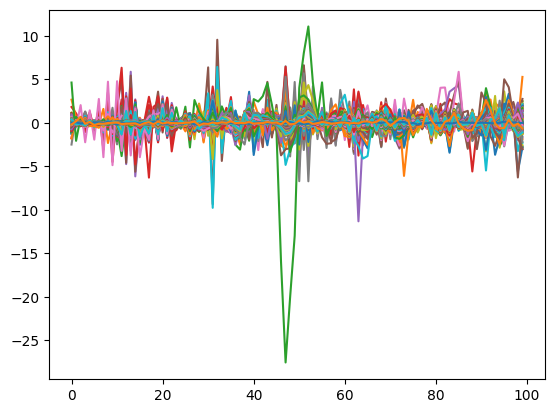

In [11]:
new_dataset, training_information = train_and_augmente(
    'tsagan',
    dataset, augmentation_percentage_list,
    if_keep_raw,
    advanced)

In [12]:
import matplotlib.pyplot as plt

def plot_losses(training_information):
    num_classes = 9
    num_epochs = len(training_information["gen_loss"]) // num_classes
    gen_losses = [training_information["gen_loss"][i * num_epochs:(i + 1) * num_epochs] for i in range(num_classes)]
    dis_losses = [training_information["dis_loss"][i * num_epochs:(i + 1) * num_epochs] for i in range(num_classes)]
    gen_accs = [training_information["gen_acc"][i * num_epochs:(i + 1) * num_epochs] for i in range(num_classes)]
    dis_accs = [training_information["dis_acc"][i * num_epochs:(i + 1) * num_epochs] for i in range(num_classes)]
    plt.figure(figsize=(15, 20))
    # Customization options
    fontsize = 15
    linestyle = "-"
    marker = "o"
    markersize = 4

    # Plot Generator Losses
    plt.subplot(2, 2, 1)
    for class_idx in range(num_classes):
        plt.plot(gen_losses[class_idx], linestyle=linestyle, marker=marker, markersize=markersize, label=f"Class {class_idx+1}")
    plt.xlabel("Epoch",fontsize=fontsize)
    plt.ylabel("Generator Loss",fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True)

    # Plot Discriminator Losses
    plt.subplot(2, 2, 2)
    for class_idx in range(num_classes):
        plt.plot(dis_losses[class_idx], linestyle=linestyle, marker=marker, markersize=markersize, label=f"Class {class_idx+1}")
    plt.xlabel("Epoch",fontsize=fontsize)
    plt.ylabel("Discriminator Loss",fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True)

    # Plot Generator Accuracies
    plt.subplot(2, 2, 3)
    for class_idx in range(num_classes):
        plt.plot(gen_accs[class_idx], linestyle=linestyle, marker=marker, markersize=markersize, label=f"Class {class_idx+1}")
    plt.xlabel("Epoch",fontsize=fontsize)
    plt.ylabel("Generator Accuracy",fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True)

    # Plot Discriminator Accuracies
    plt.subplot(2, 2, 4)
    for class_idx in range(num_classes):
        plt.plot(dis_accs[class_idx], linestyle=linestyle, marker=marker, markersize=markersize, label=f"Class {class_idx+1}")
    plt.xlabel("Epoch",fontsize=fontsize)
    plt.ylabel("Discriminator Accuracy",fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True)



In [ ]:
plot_losses(training_information)

In [ ]:
a = new_dataset['Location'][0]
a.shape

In [ ]:
# print the shapes of X and X_jittered
input_data = x_train
synthetic_data =a
print('input_data shape:', input_data.shape)
print('synthetic_data shape:', synthetic_data.shape)

In [ ]:
X = scipy.io.loadmat('/Users/joshhuang/MATLAB/ONR/Localization/Data/SignalFrame3.mat') 
Y = scipy.io.loadmat('/Users/joshhuang/MATLAB/ONR/Localization/Data/Label3.mat') 
X1 = X['SignalFrame']
Y1 = Y['Label']
X = scipy.io.loadmat('/Users/joshhuang/MATLAB/ONR/Localization/Data/SignalFrame3_1.mat') 
Y = scipy.io.loadmat('/Users/joshhuang/MATLAB/ONR/Localization/Data/Label3_1.mat') 
X2 = X['SignalFrame']
Y2 = Y['Label']
input_data = X1
synthetic_data = X2

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
A = input_data
B = synthetic_data

# Concatenate A and B into one array
AB = np.concatenate((A, B))

TSNE_AB = TSNE(n_components=2,perplexity=5)
TSNE_AB.fit(AB)
TSNE_results_AB = TSNE_AB.fit_transform(AB)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define color map and labels
cmap = plt.cm.get_cmap('tab20', 10)
labels = ['Input data', 'Synthetic data']

# Plot the scatter points
scatter_A = ax.scatter(TSNE_results_AB[:len(A), 0], TSNE_results_AB[:len(A), 1], alpha=1, marker='o', s=50, c=cmap(5), label=labels[0])
scatter_B = ax.scatter(TSNE_results_AB[len(A):, 0], TSNE_results_AB[len(A):, 1], alpha=1, marker='*', s=40, c=cmap(3), label=labels[1])
# Add axis labels, title, and legend
ax.set_xlabel(r'Component $P_{1}$')
ax.set_ylabel(r'Component $P_{2}$')
ax.set_title('TSNE 2D Plot')
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
# Generate random data
A = input_data
B = synthetic_data

# Concatenate A and B into one array
AB = np.concatenate((A, B))

TSNE_AB = TSNE(n_components=2,perplexity=5)
TSNE_AB.fit(AB)
TSNE_results_AB = TSNE_AB.fit_transform(AB)

# Create a Seaborn scatter plot
sns.scatterplot(x=TSNE_results_AB[:len(A), 0], y=TSNE_results_AB[:len(A), 1], alpha=1, marker='o', s=20, c=cmap(5), label=labels[0])
sns.scatterplot(x=TSNE_results_AB[len(A):, 0], y=TSNE_results_AB[len(A):, 1], alpha=1, marker='*', s=50, c=cmap(3), label=labels[1])

# Set the color palette and marker size
sns.set_palette('tab20')

# Add axis labels, title, and legend
ax.set_xlabel(r'Component $P_{1}$')
ax.set_ylabel(r'Component $P_{2}$')
ax.set_title('TSNE 2D Plot')
ax.grid(True)
ax.legend()

# Set the plot style
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
import seaborn as sns

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
A, A_labels = input_data, y_train.ravel()  # Assuming input_data is A and y_train are the corresponding labels
B, B_labels = new_dataset['Location']  # Assuming B is the augmented data and B_labels are the corresponding labels

# Ensure B_labels are in the range 0-8
B_labels = B_labels - B_labels.min()  # This subtracts the minimum value from all labels
B_labels = B_labels / B_labels.max()  # This divides all labels by the maximum value, so now they are in the range 0-1
B_labels = B_labels * 8  # This scales the labels so they are in the range 0-8
B_labels = B_labels.astype(int)  # This ensures the labels are integers

# Add a constant to labels for synthetic data
B_labels += 9

# Concatenate A and B into one array
AB = np.concatenate((A, B))

# Concatenate labels for A and B
AB_labels = np.concatenate((A_labels, B_labels))

# Perform TSNE
TSNE_AB = TSNE(n_components=2, perplexity=5)
TSNE_results_AB = TSNE_AB.fit_transform(AB)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Define color map and labels
cmap = plt.cm.get_cmap('tab20', np.unique(AB_labels).size)  # The color map should have as many colors as there are classes
labels = ['Class 1 (Original)', 'Class 2 (Original)',
          'Class 3 (Original)', 'Class 4 (Original)',
          'Class 5 (Original)', 'Class 6 (Original)',
          'Class 7 (Original)', 'Class 8 (Original)',
          'Class 9 (Original)', 'Class 1 (Synthetic)',
          'Class 2 (Synthetic)', 'Class 3 (Synthetic)',
          'Class 4 (Synthetic)', 'Class 5 (Synthetic)',
          'Class 6 (Synthetic)', 'Class 7 (Synthetic)',
          'Class 8 (Synthetic)', 'Class 9 (Synthetic)']  # Define your class names here

# Plot the scatter points
sns.scatterplot(x=TSNE_results_AB[:, 0], y =TSNE_results_AB[:, 1], alpha=1, s=50, c=cmap(AB_labels), label=labels, marker='o')

# Add axis labels, title, and legend
ax.set_xlabel(r'$P_{1}$')
ax.set_ylabel(r'$P_{2}$')
ax.set_title('TSNE 2D Plot')
#ax.legend(loc='best', fontsize=16, frameon=True, borderpad=1)
ax.grid(True)
plt.show()


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
A, A_labels = input_data, y_train.ravel() # Assuming input_data is A and y_train are the corresponding labels
B, B_labels = new_dataset['Location'] # Assuming B is the augmented data and B_labels are the corresponding labels

# Ensure B_labels are in the range 0-8
B_labels = B_labels - B_labels.min() # This subtracts the minimum value from all labels
B_labels = B_labels / B_labels.max() # This divides all labels by the maximum value, so now they are in the range 0-1
B_labels = B_labels * 8 # This scales the labels so they are in the range 0-8
B_labels = B_labels.astype(int) # This ensures the labels are integers

# Add a constant to labels for synthetic data
B_labels += 9

# Concatenate A and B into one array
AB = np.concatenate((A, B))

# Concatenate labels for A and B
AB_labels = np.concatenate((A_labels, B_labels))

# Perform TSNE
TSNE_AB = TSNE(n_components=2, perplexity=5)
TSNE_results_AB = TSNE_AB.fit_transform(AB)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define color map and labels
cmap = plt.cm.get_cmap('tab20', np.unique(AB_labels).size) # The color map should have as many colors as there are classes
labels = ['Class 1 (Original)', 'Class 2 (Original)',
          'Class 3 (Original)', 'Class 4 (Original)',
          'Class 5 (Original)', 'Class 6 (Original)',
          'Class 7 (Original)', 'Class 8 (Original)',
          'Class 9 ((Original)', 'Class 1 (Synthetic)',
          'Class 2 (Synthetic)', 'Class 3 (Synthetic)',
          'Class 4 (Synthetic)', 'Class 5 (Synthetic)',
          'Class 6 (Synthetic)', 'Class 7 (Synthetic)',
          'Class 8 (Synthetic)', 'Class 9 (Synthetic)'] # Define your class names here

# Plot the scatter points
for i, label in enumerate(labels):
    if i < 9:
        marker = 'o' # Original data
    else:
        marker = '+' # Synthetic data
    ax.scatter(TSNE_results_AB[AB_labels == i, 0], TSNE_results_AB[AB_labels == i, 1], alpha=1, s=50, c=cmap(i), label=label, marker=marker)

# Add axis labels, title, and legend
ax.set_xlabel(r'$P_{1}$')
ax.set_ylabel(r'$P_{2}$')
ax.set_title('TSNE 2D Plot')
ax.legend()
ax.grid(True)
plt.show()


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

A, A_labels = input_data, y_train.ravel() # Assuming input_data is A and y_train are the corresponding labels
B, B_labels = new_dataset['Location'] # Assuming B is the augmented data and B_labels are the corresponding labels

# Ensure B_labels are in the range 0-8
B_labels = B_labels - B_labels.min() # This subtracts the minimum value from all labels
B_labels = B_labels / B_labels.max() # This divides all labels by the maximum value, so now they are in the range 0-1
B_labels = B_labels * 8 # This scales the labels so they are in the range 0-8
B_labels = B_labels.astype(int) # This ensures the labels are integers


# Add a constant to labels for synthetic data
B_labels = B_labels +9

# Concatenate A and B into one array
AB = np.concatenate((A, B))

# Concatenate labels for A and B
AB_labels = np.concatenate((A_labels, B_labels))

# Perform TSNE
TSNE_AB = TSNE(n_components=2, perplexity=5)
TSNE_results_AB = TSNE_AB.fit_transform(AB)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define color map and labels
cmap = plt.cm.get_cmap('tab10', 2) # The color map should have two colors as we are plotting two classes
labels = ['Class 1 (Original)', 'Class 1 (Synthetic)'] # We only have two classes to plot
# Plot the scatter points
# Clear the figure
#plt.clf()
for i, label in enumerate(labels):
    marker = 'o' if i == 0 else '*' # Original data if i is 0, else synthetic data
    print(i)
    ax.scatter(TSNE_results_AB[AB_labels == i*9+1, 0], TSNE_results_AB[AB_labels == i*9+1, 1], alpha=1, s=50, c=cmap(i), label=label, marker=marker)

# Add axis labels, title, and legend
ax.set_xlabel(r'$P_{1}$')
ax.set_ylabel(r'$P_{2}$')
ax.set_title('TSNE 2D Plot')
ax.legend()
ax.grid(True)
plt.show()

Add a gradient penalty to the discriminator loss to enforce the Lipschitz constraint more effectively. This can help stabilize the training process and prevent model collapse. To do this, you'll need to modify the wasserstein_loss function and the training loop in the train method.

First, update the wasserstein_loss function to include the gradient penalty:These modifications should help stabilize the training process and reduce the likelihood of model collapse. If the issue persists, consider experimenting with different network architectures, activation functions, or training hyperparameters.

In [ ]:
import scipy.io as sio

# extract arrays
SignalFrame = new_dataset['Location'][0]
Label = new_dataset['Location'][1]
Label = np.reshape(Label, (Label.shape[0], 1))
# save SignalFrame as .mat file
sio.savemat('/Users/joshhuang/PythonFolder/ONR/Transfer Learning/Data/Source/SignalFrame2.mat', {'SignalFrame': SignalFrame})
# save Label as .mat file
sio.savemat('/Users/joshhuang/PythonFolder/ONR/Transfer Learning/Data/Source/Label2.mat', {'Label': Label})


In [ ]:
Utils.savetofile(new_dataset, dataset_name, "./tmp/Synthetic_data.csv")

In [ ]:
output_dir ='./tmp'

In [ ]:
new_dataset